In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import FuncFormatter, MaxNLocator

df = pd.read_csv("preprocessing_data.csv")

df

,STT,Tên Quốc Gia,Thủ Đô,Diện Tích Lãnh Thổ (km²),Tổng Dân Số,Mật Độ Dân Số (người/km²),Tuổi Thọ Trung Bình,Tỷ Lệ Biết Chữ (%),Tỷ Lệ Đô Thị Hoá (%),GDP (triệu tỷ USD),GDP Bình Quân Đầu Người (người/USD),Tỷ Lệ Thất Nghiệp (%),Tỷ Lệ Sinh (‰),Tỷ Lệ Tử (‰),Số Bang/Tỉnh,Số Di Sản Văn Hoá UNESCO,Tổng Số Khách Đến Du Lịch (triệu người),Tổng Thu Nhập Du Lịch (tỷ USD),Chỉ Số HDI (Human Development Index)
0,1,Afghanistan,Kabul,652230.0,40578842.0,62,63.0,0.373,0.266,14583.0,359.374,0.141,0.360,0.060,34,2,0.000,0.000,0.462
1,2,Albania,Tirana,27400.0,2777689.0,101,77.0,0.990,0.638,18882.0,6797.737,0.101,0.103,0.087,12,3,0.072,0.030,0.789
2,3,Algeria,Algiers,2381741.0,45477389.0,19,77.0,0.814,0.748,191913.0,4219.965,0.124,0.205,0.046,58,6,0.014,0.002,0.745
3,4,Andorra,Andorra la Vella,470.0,79705.0,170,0.0,1.000,0.878,3352.0,42055.078,0.000,0.068,0.059,7,1,0.036,0.022,0.884
4,5,Angola,Luanda,1246700.0,35635029.0,29,62.0,0.720,0.681,106714.0,2994.638,0.146,0.381,0.071,18,0,0.001,0.000,0.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,192,"Venezuela, RB",Caracas,882050.0,28213017.0,32,71.0,0.975,0.884,0.0,0.000,0.057,0.150,0.073,24,2,0.007,0.003,0.699
190,193,Viet Nam,Hanoi,313429.0,99680655.0,318,75.0,0.958,0.388,408802.0,4101.117,0.015,0.143,0.065,63,5,0.037,0.038,0.726
191,194,"Yemen, Rep.",Sana'a,527970.0,38222876.0,72,64.0,0.701,0.392,0.0,0.000,0.174,0.354,0.052,22,4,0.000,0.000,0.424
192,195,Zambia,Lusaka,743390.0,20152938.0,27,62.0,0.867,0.458,29784.0,1477.899,0.060,0.335,0.056,10,0,0.011,0.008,0.569


# Import Các Thư Viện

Đoạn code này nhập các thư viện Python cần thiết cho việc phân tích và trực quan hóa dữ liệu.

- `import pandas as pd`: Nhập thư viện Pandas, thường được sử dụng để làm việc với dữ liệu dạng bảng (DataFrames). Chúng ta gán bí danh `pd` để tiện sử dụng.

- `import seaborn as sns`: Nhập thư viện Seaborn, một thư viện xây dựng trên Matplotlib, cung cấp giao diện cấp cao hơn để tạo các biểu đồ thống kê đẹp mắt. Chúng ta gán bí danh `sns`.

- `import matplotlib.pyplot as plt`: Nhập module `pyplot` từ thư viện Matplotlib, thường được sử dụng để tạo các biểu đồ cơ bản và tùy chỉnh. Chúng ta gán bí danh `plt`.

- `import squarify`: Nhập thư viện Squarify, được sử dụng để tạo biểu đồ treemap.

- `import plotly.express as px`: Nhập module `express` từ thư viện Plotly, một thư viện mạnh mẽ để tạo các biểu đồ tương tác. Chúng ta gán bí danh `px`.

- `from matplotlib.ticker import FuncFormatter`: Nhập lớp `FuncFormatter` từ `matplotlib.ticker`, được sử dụng để tùy chỉnh định dạng các ticks trên trục của biểu đồ.

- `from mpl_toolkits.mplot3d import Axes3D`: Nhập module `Axes3D` từ `mpl_toolkits.mplot3d`, cần thiết để tạo biểu đồ 3D bằng Matplotlib.

- `from sklearn.preprocessing import MinMaxScaler`: Nhập lớp `MinMaxScaler` từ `sklearn.preprocessing`, được sử dụng để chuẩn hóa dữ liệu về một phạm vi nhất định.

- `from matplotlib.ticker import FuncFormatter, MaxNLocator`: Nhập lại `FuncFormatter` (có thể dư thừa nếu đã nhập ở trên) và `MaxNLocator` từ `matplotlib.ticker`, được sử dụng để kiểm soát số lượng ticks trên trục.

## Đọc Dữ Liệu

```python
df = pd.read_csv("preprocessing_data.csv") 

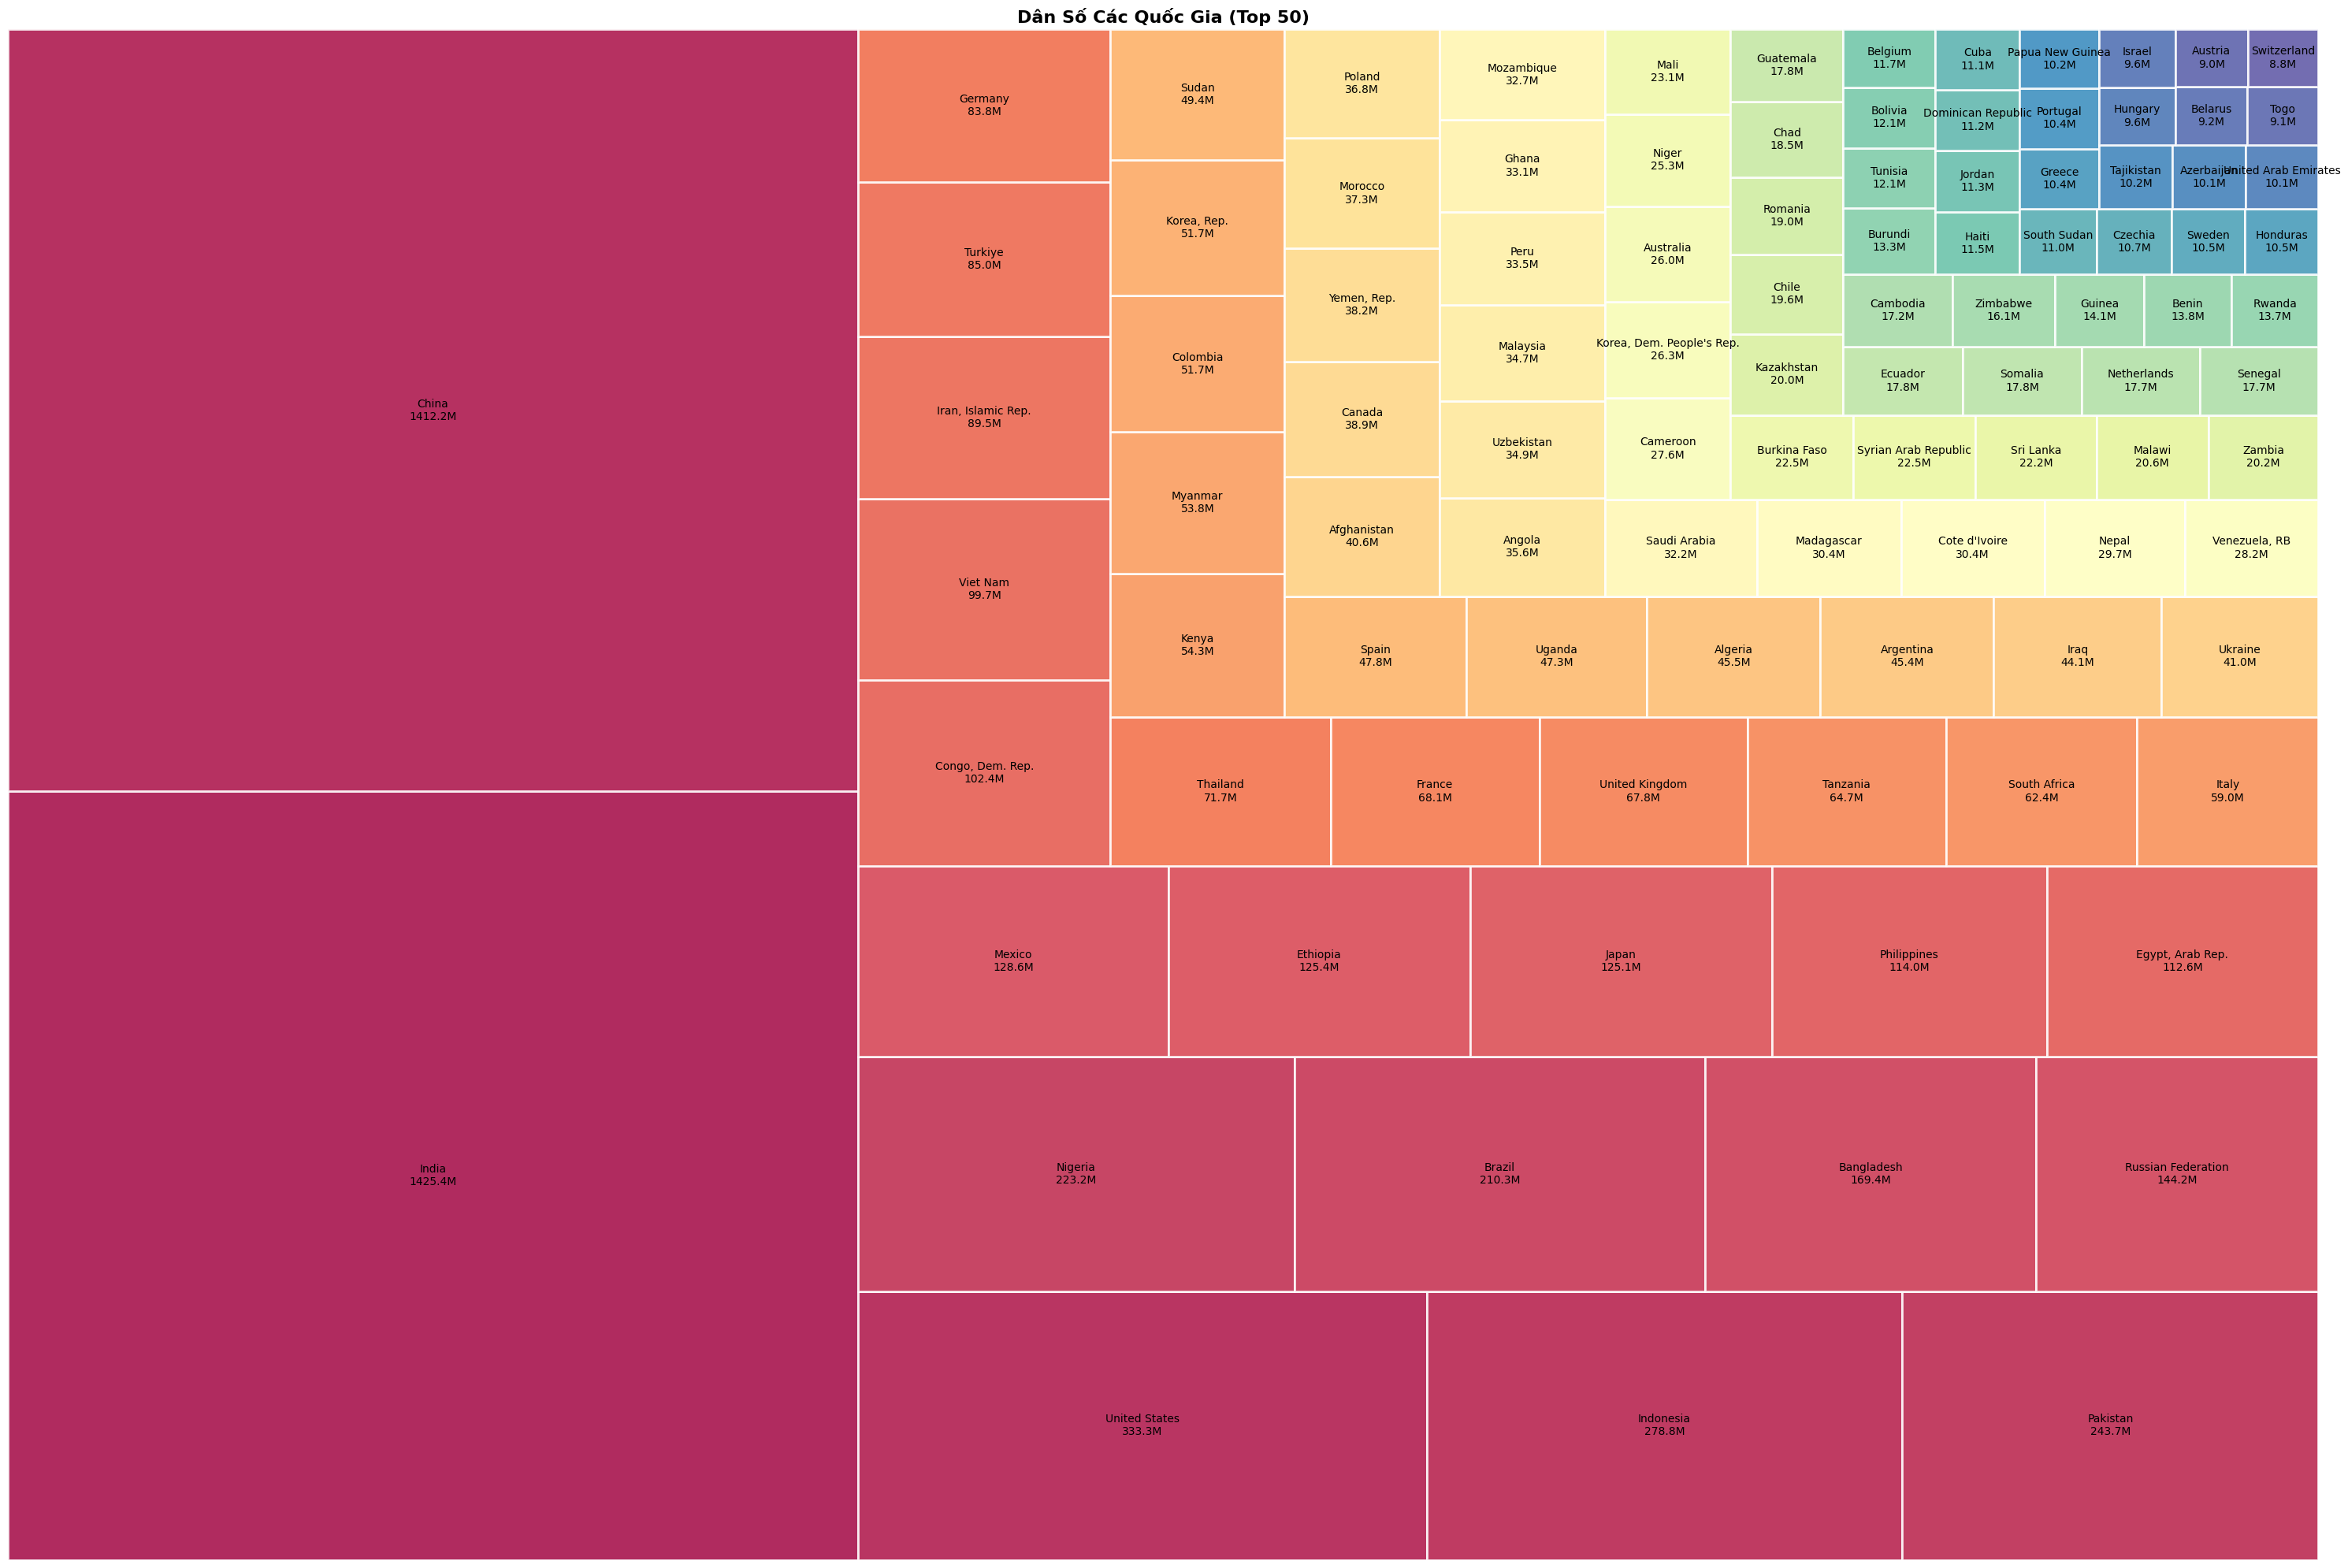

In [2]:
df["Tổng Dân Số"] = pd.to_numeric(df["Tổng Dân Số"], errors="coerce")
df_treemap = df.dropna(subset=["Tổng Dân Số"])

df_treemap = df_treemap.sort_values(by="Tổng Dân Số", ascending=False).head(100)
sizes = df_treemap["Tổng Dân Số"]
labels = df_treemap["Tên Quốc Gia"] + "\n" + (df_treemap["Tổng Dân Số"] / 1e6).round(1).astype(str) + "M"

plt.figure(figsize=(30, 20))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette("Spectral", len(sizes)),
    alpha=0.85,
    edgecolor='white',
    linewidth=2,
    
)

plt.title("Dân Số Các Quốc Gia (Top 50)", fontsize=16, weight='bold')
plt.axis("off")  
plt.tight_layout()
plt.show()

- `df["Tổng Dân Số"] = pd.to_numeric(...)`: Chuyển cột "Tổng Dân Số" sang số, lỗi thành NaN.
- `df_treemap = df.dropna(...)`: Loại bỏ hàng có NaN ở cột "Tổng Dân Số".
- `df_treemap = df_treemap.sort_values(...).head(100)`: Sắp xếp theo dân số giảm dần, lấy top 100.
- `sizes = df_treemap["Tổng Dân Số"]`: Dân số làm kích thước ô.
- `labels = ...`: Tạo nhãn: Tên quốc gia + xuống dòng + Dân số (triệu M).

- `plt.figure(figsize=(30, 20))`: Tạo vùng vẽ lớn (30x20 inch).
- `squarify.plot(...)`: Vẽ biểu đồ treemap:
    - `sizes`: Kích thước ô.
    - `label`: Nhãn ô.
    - `color`: Bảng màu "Spectral".
    - `alpha`: Độ trong suốt 0.85.
    - `edgecolor`: Viền trắng.
    - `linewidth`: Độ dày viền 2.

- `plt.title(...)`: Tiêu đề "Dân Số Các Quốc Gia (Top 50)", cỡ chữ 16, đậm.
- `plt.axis("off")`: Tắt trục.
- `plt.tight_layout()`: Điều chỉnh layout.
- `plt.show()`: Hiển thị biểu đồ.

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\3526767894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Dân Số", data=top10_population, palette=colors)


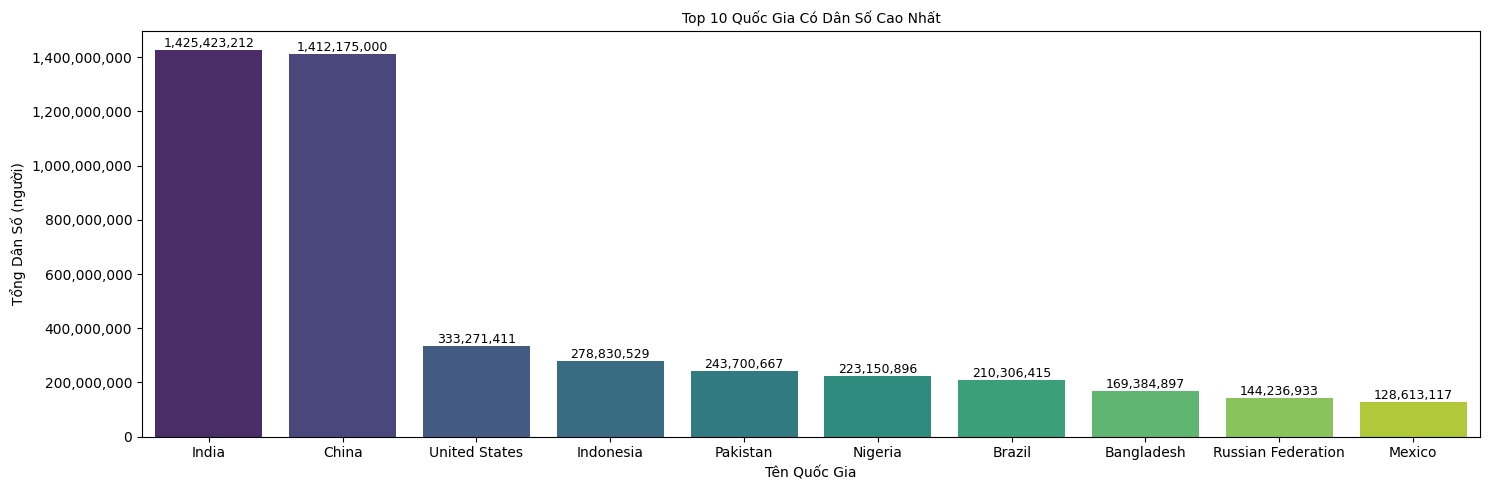

In [3]:
df["Tổng Dân Số"] = pd.to_numeric(df["Tổng Dân Số"], errors="coerce")
top10_population = df.sort_values(by="Tổng Dân Số", ascending=False).head(10)
colors = sns.color_palette("viridis", len(top10_population))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Dân Số", data=top10_population, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tổng Dân Số (người)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Dân Số Cao Nhất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_population.iterrows():
    ax.text(
        x=top10_population.index.get_loc(i),
        y=row["Tổng Dân Số"],
        s=f'{int(row["Tổng Dân Số"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\1010028164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x="Tên Quốc Gia", y="Tuổi Thọ Trung Bình", data=top10_population_age, palette=colors)


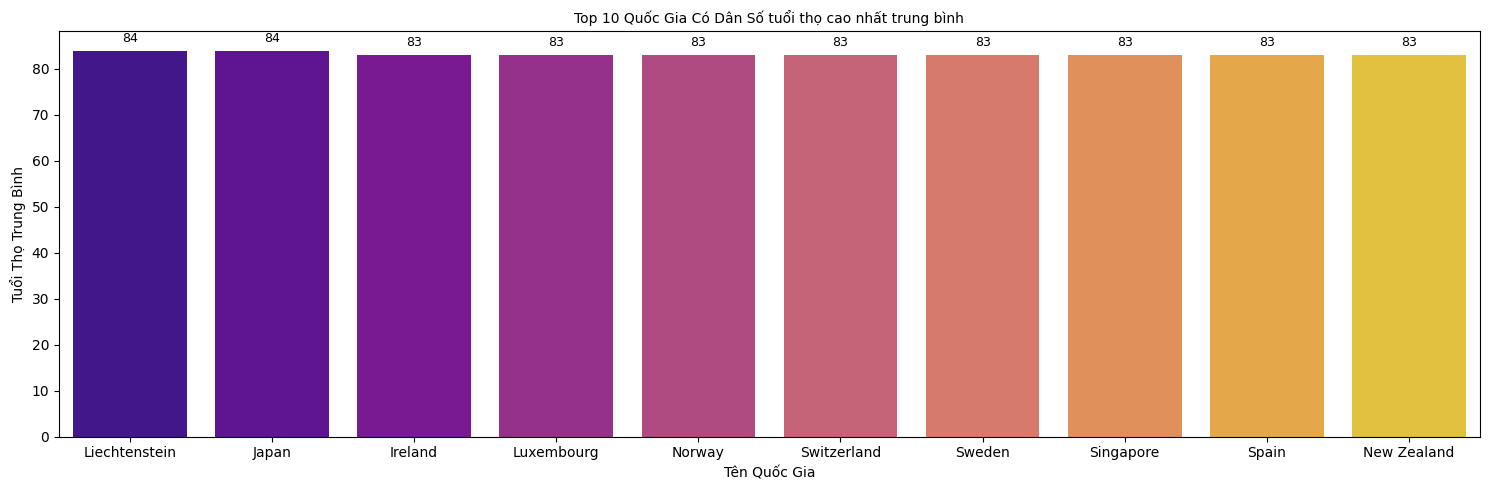

In [4]:
df["Tuổi Thọ Trung Bình"] = pd.to_numeric(df["Tuổi Thọ Trung Bình"], errors="coerce")
top10_population_age = df.sort_values(by="Tuổi Thọ Trung Bình", ascending=False).head(10)
colors = sns.color_palette("plasma", len(top10_population_age))
plt.figure(figsize=(15, 5))
barplot = sns.barplot(x="Tên Quốc Gia", y="Tuổi Thọ Trung Bình", data=top10_population_age, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tuổi Thọ Trung Bình", fontsize=10)
plt.title("Top 10 Quốc Gia Có Dân Số tuổi thọ cao nhất trung bình", fontsize=10)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height()):,}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),             
                    textcoords='offset points',
                    fontsize=9,
                    color='black')

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\3022550825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Diện Tích Lãnh Thổ (km²)", data=top10_area, palette=colors)


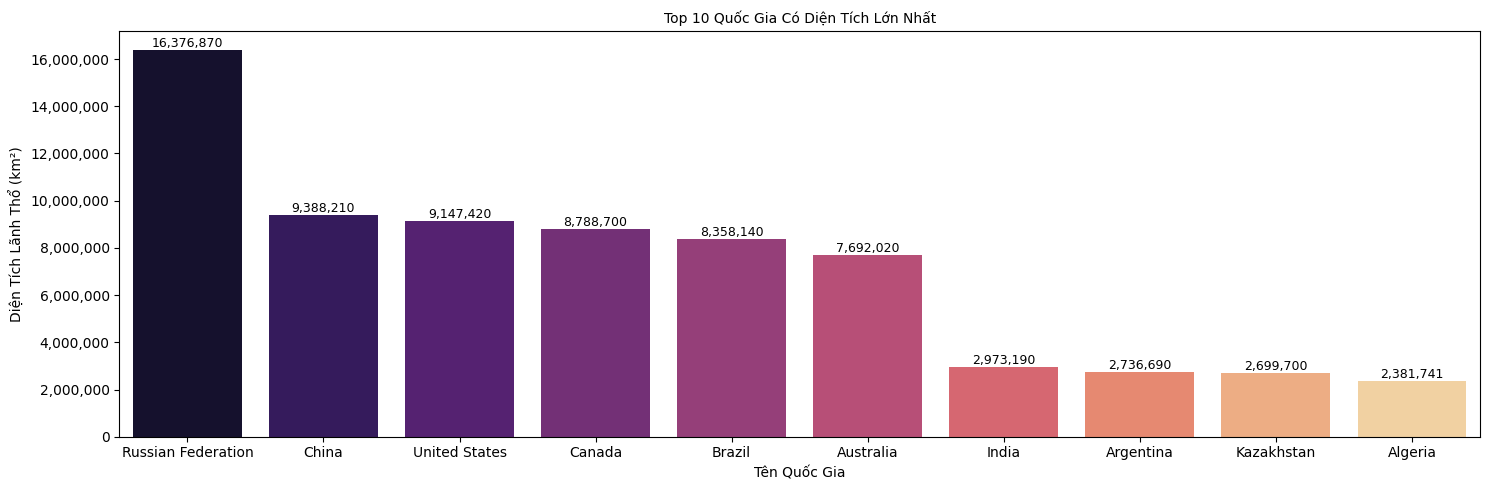

In [5]:
df["Diện Tích Lãnh Thổ (km²)"] = pd.to_numeric(df["Diện Tích Lãnh Thổ (km²)"], errors="coerce")
top10_area = df.sort_values(by="Diện Tích Lãnh Thổ (km²)", ascending=False).head(10)
colors = sns.color_palette("magma", len(top10_area))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Diện Tích Lãnh Thổ (km²)", data=top10_area, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Diện Tích Lãnh Thổ (km²)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Diện Tích Lớn Nhất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_area.iterrows():
    ax.text(
        x=top10_area.index.get_loc(i),
        y=row["Diện Tích Lãnh Thổ (km²)"],
        s=f'{int(row["Diện Tích Lãnh Thổ (km²)"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\957687535.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tỷ Lệ Thất Nghiệp (%)", y="Tên Quốc Gia", data=top30_unemployee, palette=colors)


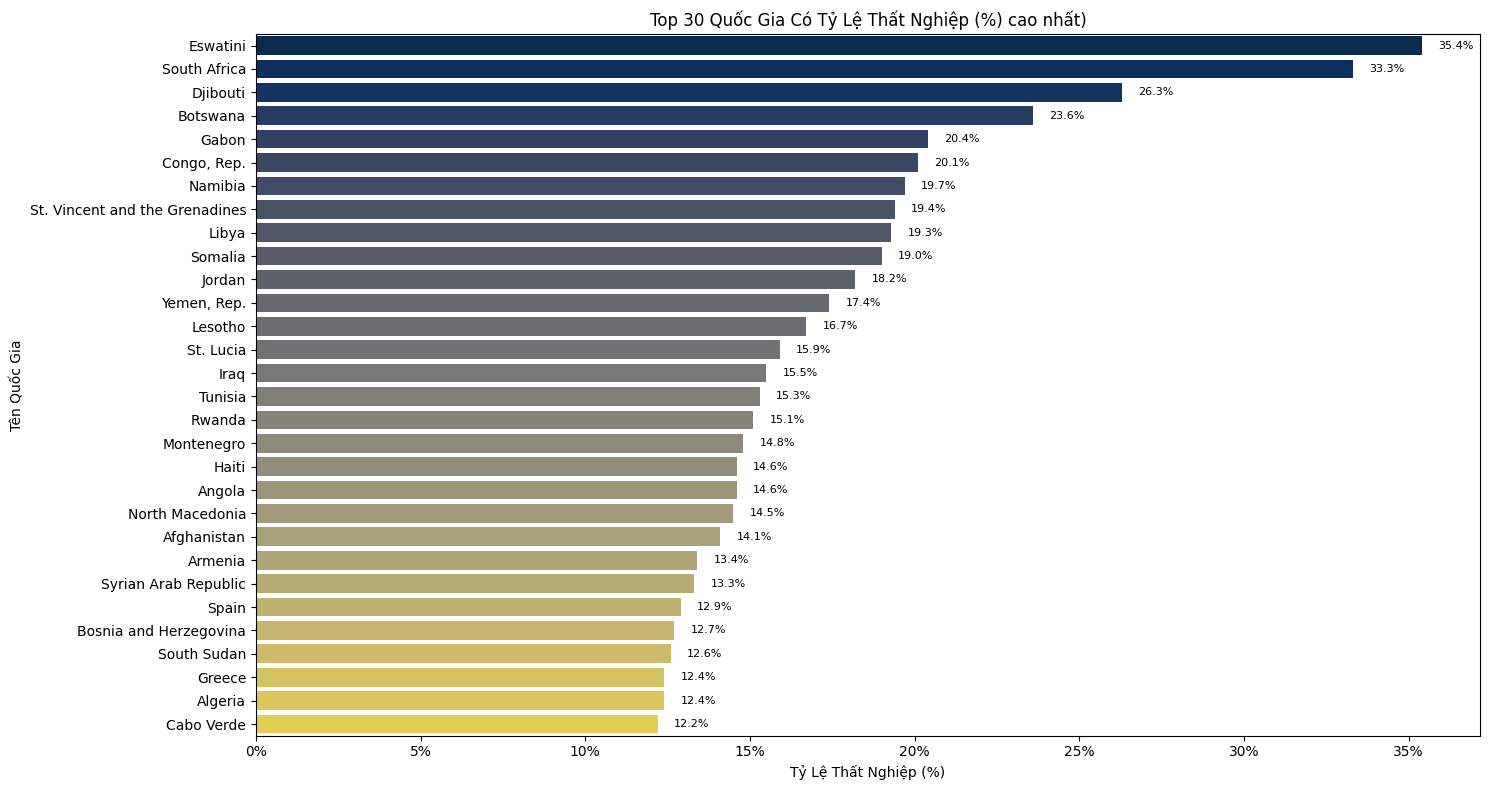

In [6]:
df["Tỷ Lệ Thất Nghiệp (%)"] = pd.to_numeric(df["Tỷ Lệ Thất Nghiệp (%)"], errors="coerce")

top30_unemployee = df.sort_values(by="Tỷ Lệ Thất Nghiệp (%)", ascending=False).head(30)

# Tạo bảng màu
colors = sns.color_palette("cividis", len(top30_unemployee))

# Vẽ biểu đồ
plt.figure(figsize=(15, 8))
ax = sns.barplot(x="Tỷ Lệ Thất Nghiệp (%)", y="Tên Quốc Gia", data=top30_unemployee, palette=colors)
plt.xticks(rotation=0)
plt.xlabel("Tỷ Lệ Thất Nghiệp (%)", fontsize=10) # Label vẫn để per mille theo yêu cầu
plt.ylabel("Tên Quốc Gia", fontsize=10)
plt.title("Top 30 Quốc Gia Có Tỷ Lệ Thất Nghiệp (%) cao nhất)", fontsize=12) # Title vẫn để per mille

# Thêm giá trị đã nhân 1000 và ký hiệu per mille
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.005,
             p.get_y() + p.get_height() / 2.,
             f'{width * 100:.1f}%', # Nhân giá trị với 1000 và thêm ký hiệu per mille
             ha='left', va='center', fontsize=8, color='black')

# Định dạng trục x để hiển thị giá trị nhân 1000 với ký hiệu per mille
def format_per_mille(x, pos):
    return f'{x * 100:.0f}%'

formatter = FuncFormatter(format_per_mille)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

- `plt.figure(figsize=(15, 8))`: Tạo vùng vẽ kích thước 15x8 inch.

- `ax = sns.barplot(...)`: Vẽ biểu đồ bar ngang.
    - `x="Tỷ Lệ Thất Nghiệp (%)"`: Trục x là tỷ lệ thất nghiệp.
    - `y="Tên Quốc Gia"`: Trục y là tên quốc gia (hiển thị dọc).
    - `data=top30_unemployee`: Dữ liệu từ DataFrame top 30.
    - `palette=colors`: Sử dụng bảng màu đã tạo.

- `plt.xticks(rotation=0)`: Nhãn trục x nằm ngang.

- `plt.xlabel(...)`: Nhãn trục x là "Tỷ Lệ Thất Nghiệp (%)", cỡ chữ 10.

- `plt.ylabel(...)`: Nhãn trục y là "Tên Quốc Gia", cỡ chữ 10.

- `plt.title(...)`: Tiêu đề "Top 30 Quốc Gia Có Tỷ Lệ Thất Nghiệp (%) cao nhất)", cỡ chữ 12.

# Trên biểu đồ `ax`.
- `width = p.get_width()`: Lấy chiều rộng của bar (giá trị tỷ lệ thất nghiệp).

- `plt.text(...)`: Thêm giá trị tỷ lệ thất nghiệp vào cuối mỗi bar.
    - Vị trí x: `width + 0.005` (hơi lệch phải).
    - Vị trí y: giữa chiều cao bar.
    - Nội dung: giá trị nhân 100, định dạng 1 số thập phân, thêm "%".
    - Căn chỉnh: trái, giữa.
    - Cỡ chữ: 8, màu đen.

- `def format_per_mille(x, pos):`: Định nghĩa hàm định dạng ticks trục x.
    - Nhận giá trị tick `x` và vị trí `pos`.
    - Trả về chuỗi: `x` nhân 100, làm tròn nguyên, thêm "%".

- `formatter = FuncFormatter(format_per_mille)`: Tạo đối tượng formatter từ hàm.

- `ax.xaxis.set_major_formatter(formatter)`: Áp dụng formatter cho ticks chính trên trục x, hiển thị giá trị phần trăm.

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\3399495990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="GDP (triệu tỷ USD)", data=top10_gdp, palette=colors)


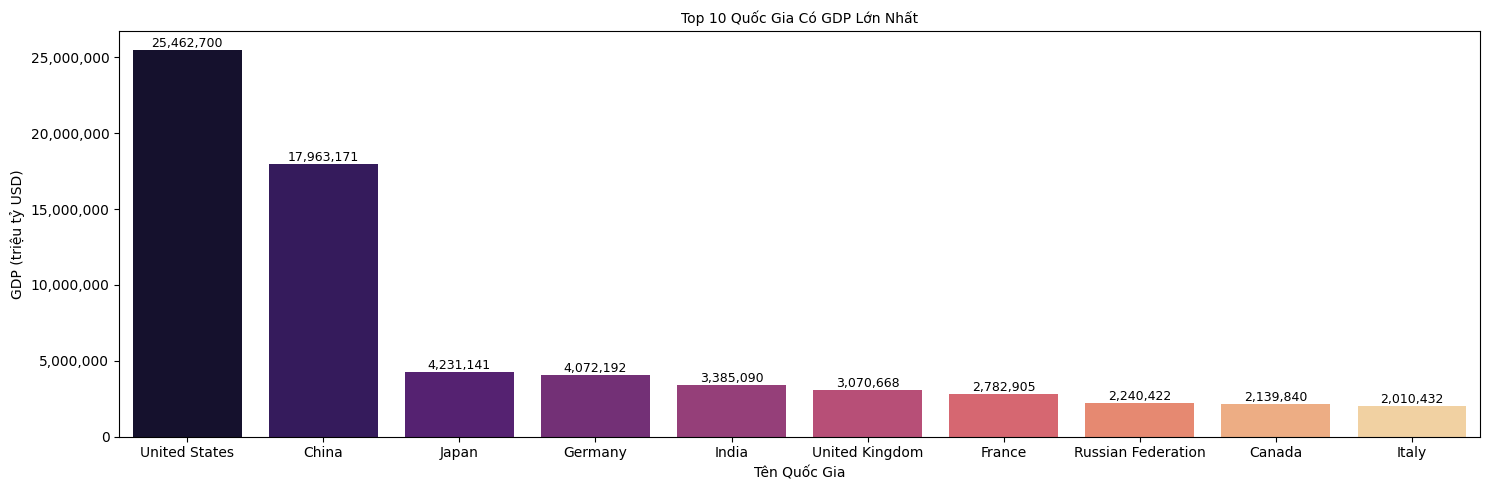

In [7]:
df["GDP (triệu tỷ USD)"] = pd.to_numeric(df["GDP (triệu tỷ USD)"], errors="coerce")
top10_gdp = df.sort_values(by="GDP (triệu tỷ USD)", ascending=False).head(10)
colors = sns.color_palette("magma", len(top10_gdp))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="GDP (triệu tỷ USD)", data=top10_gdp, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("GDP (triệu tỷ USD)", fontsize=10)
plt.title("Top 10 Quốc Gia Có GDP Lớn Nhất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_gdp.iterrows():
    ax.text(
        x=top10_gdp.index.get_loc(i),
        y=row["GDP (triệu tỷ USD)"],
        s=f'{int(row["GDP (triệu tỷ USD)"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\3380827568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Mật Độ Dân Số (người/km²)", data=top10_pop_density, palette=colors)


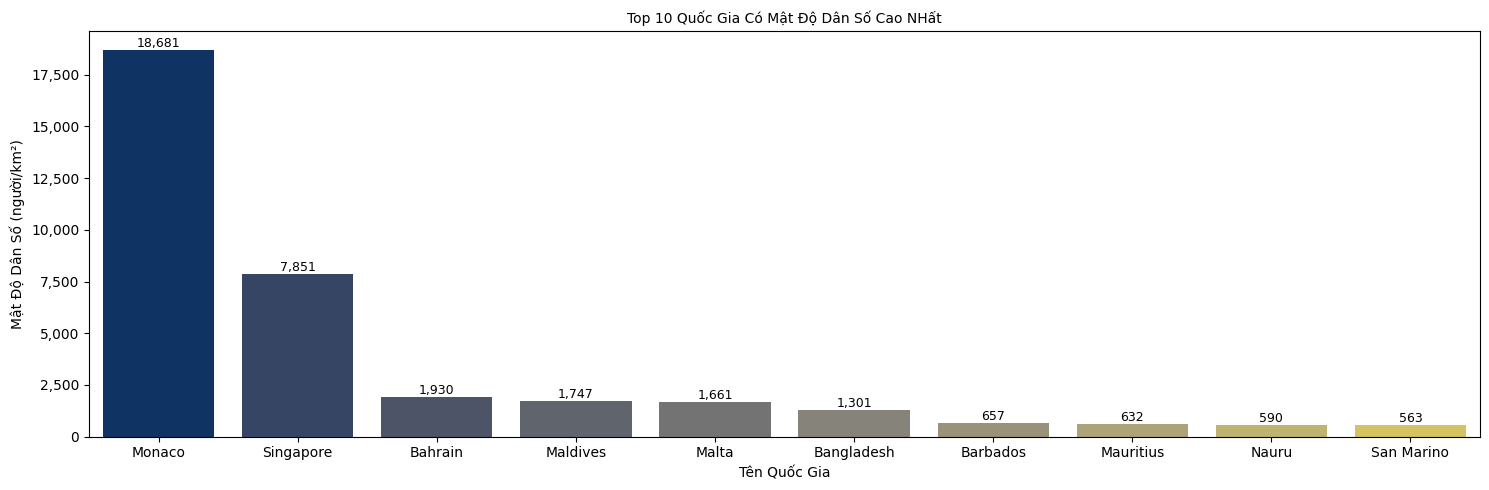

In [8]:
df["Mật Độ Dân Số (người/km²))"] = pd.to_numeric(df["Mật Độ Dân Số (người/km²)"], errors="coerce")
top10_pop_density = df.sort_values(by="Mật Độ Dân Số (người/km²)", ascending=False).head(10)
colors = sns.color_palette("cividis", len(top10_pop_density))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Mật Độ Dân Số (người/km²)", data=top10_pop_density, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Mật Độ Dân Số (người/km²)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Mật Độ Dân Số Cao NHất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_pop_density.iterrows():
    ax.text(
        x=top10_pop_density.index.get_loc(i),
        y=row["Mật Độ Dân Số (người/km²))"],
        s=f'{int(row["Mật Độ Dân Số (người/km²)"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\1378755469.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Tỷ Lệ Tử (‰)", data=top10_death_Per, palette=colors)


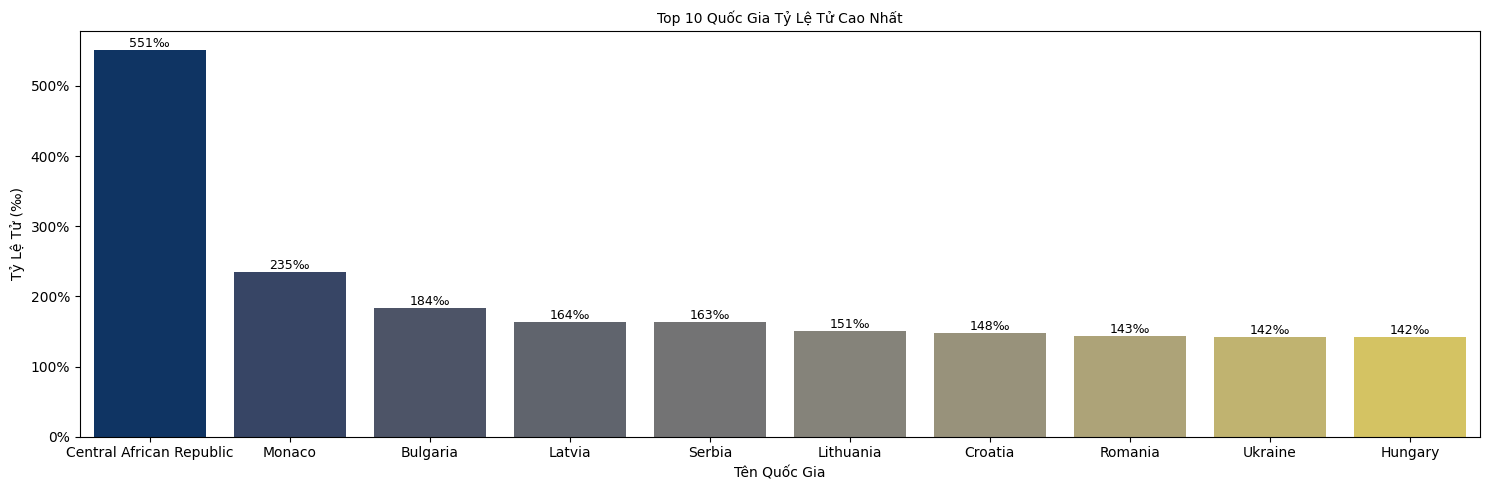

In [9]:
####

df["Tỷ Lệ Tử (‰)"] = pd.to_numeric(df["Tỷ Lệ Tử (‰)"], errors="coerce")
top10_death_Per = df.sort_values(by="Tỷ Lệ Tử (‰)", ascending=False).head(10)
colors = sns.color_palette("cividis", len(top10_death_Per))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tỷ Lệ Tử (‰)", data=top10_death_Per, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tỷ Lệ Tử (‰)", fontsize=10)
plt.title("Top 10 Quốc Gia Tỷ Lệ Tử Cao Nhất", fontsize=10)

for i, row in top10_death_Per.iterrows():
    ax.text(
        x=top10_death_Per.index.get_loc(i),
        y=row["Tỷ Lệ Tử (‰)"],
        s=f'{row["Tỷ Lệ Tử (‰)"] * 1000:.0f}‰',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x * 1000:.0f}%')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\3910925249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Tỷ Lệ Sinh (‰)", data=top10_live_Per, palette=colors)


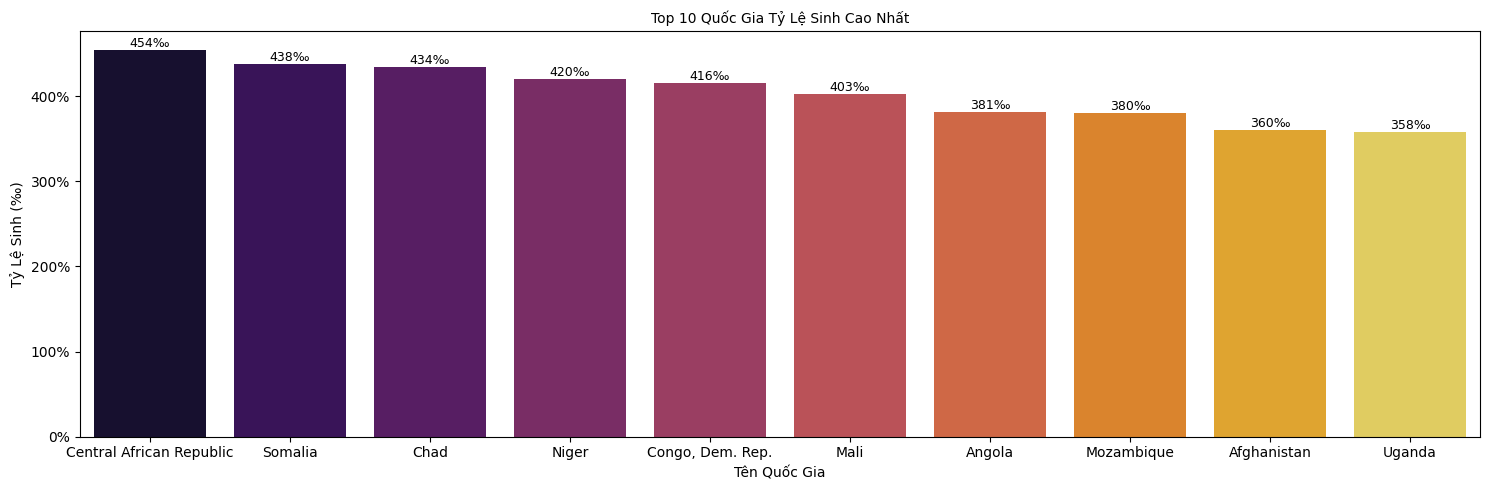

In [10]:
df["Tỷ Lệ Sinh (‰)"] = pd.to_numeric(df["Tỷ Lệ Sinh (‰)"], errors="coerce")
top10_live_Per= df.sort_values(by="Tỷ Lệ Sinh (‰)", ascending=False).head(10)
colors = sns.color_palette("inferno", len(top10_live_Per))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tỷ Lệ Sinh (‰)", data=top10_live_Per, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tỷ Lệ Sinh (‰)", fontsize=10)
plt.title("Top 10 Quốc Gia Tỷ Lệ Sinh Cao Nhất", fontsize=10)

for i, row in top10_live_Per.iterrows():
    ax.text(
        x=top10_live_Per.index.get_loc(i),
        y=row["Tỷ Lệ Sinh (‰)"],
        s=f'{row["Tỷ Lệ Sinh (‰)"] * 1000:.0f}‰',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x * 1000:.0f}%')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\494737680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Chỉ Số HDI (Human Development Index)", data=top30_HDI, palette=colors)


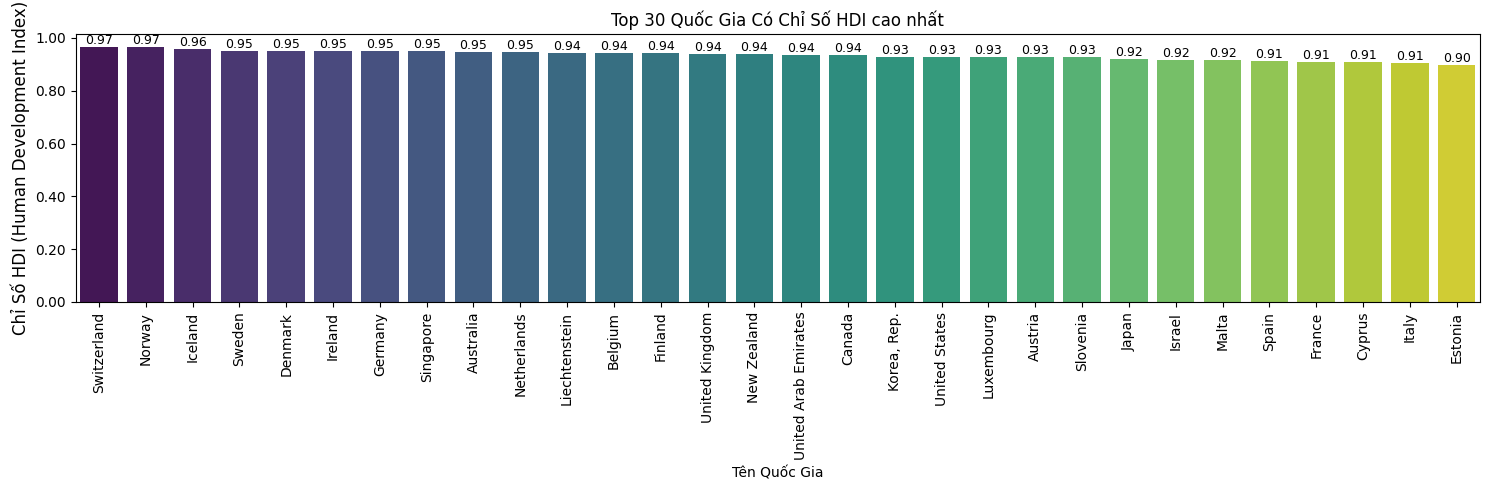

In [11]:
df["Chỉ Số HDI (Human Development Index)"] = pd.to_numeric(df["Chỉ Số HDI (Human Development Index)"], errors="coerce")
top30_HDI = df.sort_values(by="Chỉ Số HDI (Human Development Index)", ascending=False).head(30)
colors = sns.color_palette("viridis", len(top30_HDI))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Chỉ Số HDI (Human Development Index)", data=top30_HDI, palette=colors)
plt.xticks(rotation=90)
plt.ylabel("Chỉ Số HDI (Human Development Index)", fontsize=12)
plt.title("Top 30 Quốc Gia Có Chỉ Số HDI cao nhất", fontsize=12)
for idx, row in top30_HDI.iterrows():
    ax.text(
        x=top30_HDI.index.get_loc(idx), 
        y=row["Chỉ Số HDI (Human Development Index)"],   
        s=f'{row["Chỉ Số HDI (Human Development Index)"]:.2f}',      
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\2214523866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Số Khách Đến Du Lịch (triệu người)", data=top10_total_tourist, palette=colors)


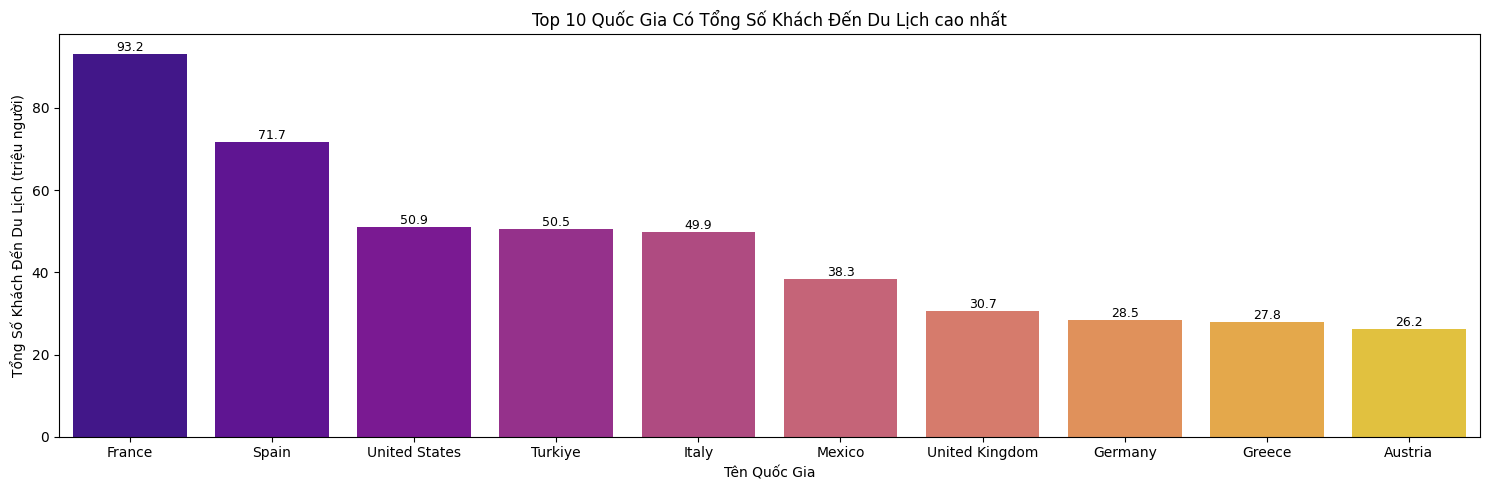

In [12]:
df["Tổng Số Khách Đến Du Lịch (triệu người)"] = pd.to_numeric(df["Tổng Số Khách Đến Du Lịch (triệu người)"], errors="coerce")

top10_total_tourist = df.sort_values(by="Tổng Số Khách Đến Du Lịch (triệu người)", ascending=False).head(10)
colors = sns.color_palette("plasma", len(top10_total_tourist))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Số Khách Đến Du Lịch (triệu người)", data=top10_total_tourist, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tổng Số Khách Đến Du Lịch (triệu người)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Tổng Số Khách Đến Du Lịch cao nhất", fontsize=12)
for idx, row in top10_total_tourist.iterrows():
    ax.text(
        x=top10_total_tourist.index.get_loc(idx),
        y=row["Tổng Số Khách Đến Du Lịch (triệu người)"],
        s=f'{row["Tổng Số Khách Đến Du Lịch (triệu người)"] * 100:.1f}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x * 100:.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7972\1977735013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tên Quốc Gia", y="Số Di Sản Văn Hoá UNESCO", data=top20_UNESCO, palette=colors)


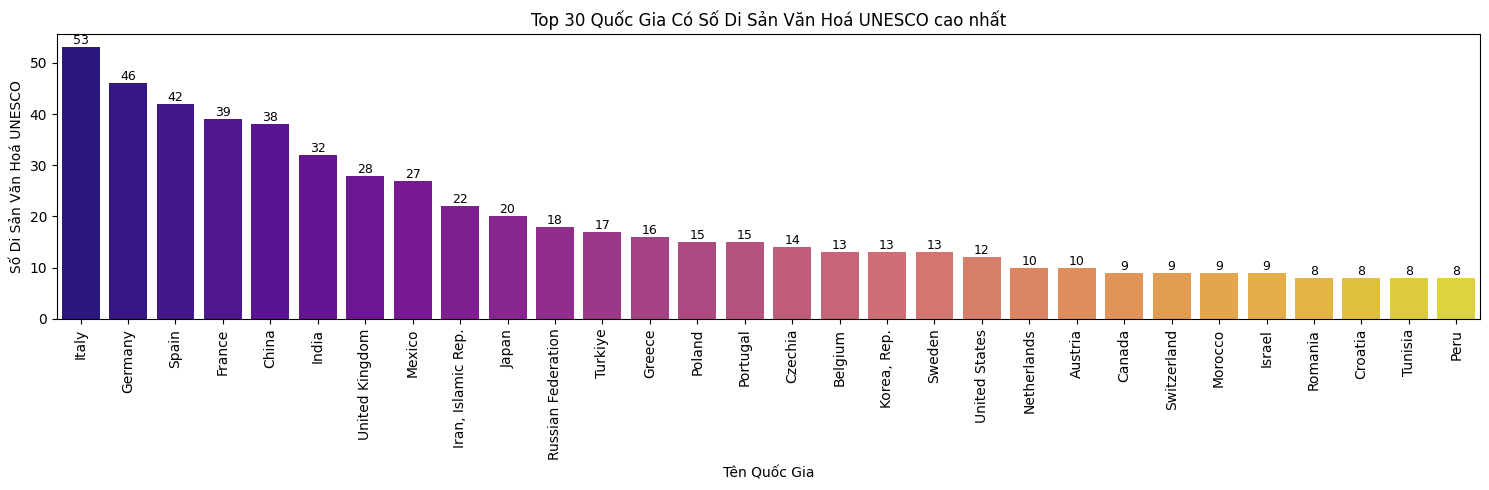

In [13]:
df["Số Di Sản Văn Hoá UNESCO"] = pd.to_numeric(df["Số Di Sản Văn Hoá UNESCO"], errors="coerce")
top20_UNESCO = df.sort_values(by="Số Di Sản Văn Hoá UNESCO", ascending=False).head(30)
colors = sns.color_palette("plasma", len(top20_UNESCO))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Số Di Sản Văn Hoá UNESCO", data=top20_UNESCO, palette=colors)
plt.xticks(rotation=(90))
plt.ylabel("Số Di Sản Văn Hoá UNESCO", fontsize=10)
plt.title("Top 30 Quốc Gia Có Số Di Sản Văn Hoá UNESCO cao nhất", fontsize=12)
for idx, row in top20_UNESCO.iterrows():
    ax.text(
        x=top20_UNESCO.index.get_loc(idx),
        y=row["Số Di Sản Văn Hoá UNESCO"],
        s=f'{int(row["Số Di Sản Văn Hoá UNESCO"])}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{int(x)}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

- `df["cột dữ liệu"] = pd.to_numeric(df["cột dữ liệu"], errors="coerce")`: Chuyển cột "cột dữ liệu" sang số, lỗi thành NaN.

- `tên_biến = df.sort_values(by="cột dữ liệu", ascending=False).head(10)`: Sắp xếp `df` theo "cột dữ liệu" giảm dần, lấy top 10.

- `colors = sns.color_palette("cividis", len(tên_biến))`: Tạo bảng màu "cividis" cho số lượng mục.


- `plt.figure(figsize=(15, 5))`: Tạo vùng vẽ kích thước 15x5.

- `ax = sns.barplot(x="Tên Quốc Gia", y="dữ liệu cột", data=tên_biến, palette=colors)`: Vẽ biểu đồ bar dọc.
    - Trục x: "Tên Quốc Gia".
    - Trục y: "dữ liệu cột".
    - Dữ liệu: `tên_biến`.
    - Màu: `colors`.
- `plt.xticks(rotation=0)`: Nhãn x nằm ngang.
- `plt.ylabel("dữ liệu cột", fontsize=10)`: Nhãn trục y.
- `plt.title("tiêu đề", fontsize=10)`: Tiêu đề biểu đồ.



- Lặp qua các hàng của `tên_biến`.
- `ax.text(...)`: Thêm giá trị lên trên mỗi bar.
    - `x`: Vị trí x của nhãn.
    - `y`: Vị trí y của nhãn.
    - `s`: Giá trị định dạng (nhân 1000, thêm "‰").
    - `ha`, `va`: Căn chỉnh.
    - `fontsize`, `color`: Thuộc tính chữ.



- `formatter = FuncFormatter(...)`: Hàm định dạng trục y (nhân 1000, thêm "%").
- `plt.gca().yaxis.set_major_formatter(formatter)`: Áp dụng định dạng cho trục y.


- `plt.tight_layout()`: Điều chỉnh layout.
- `plt.show()`: Hiển thị biểu đồ.

In [14]:
print(df.columns)




Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


In [15]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


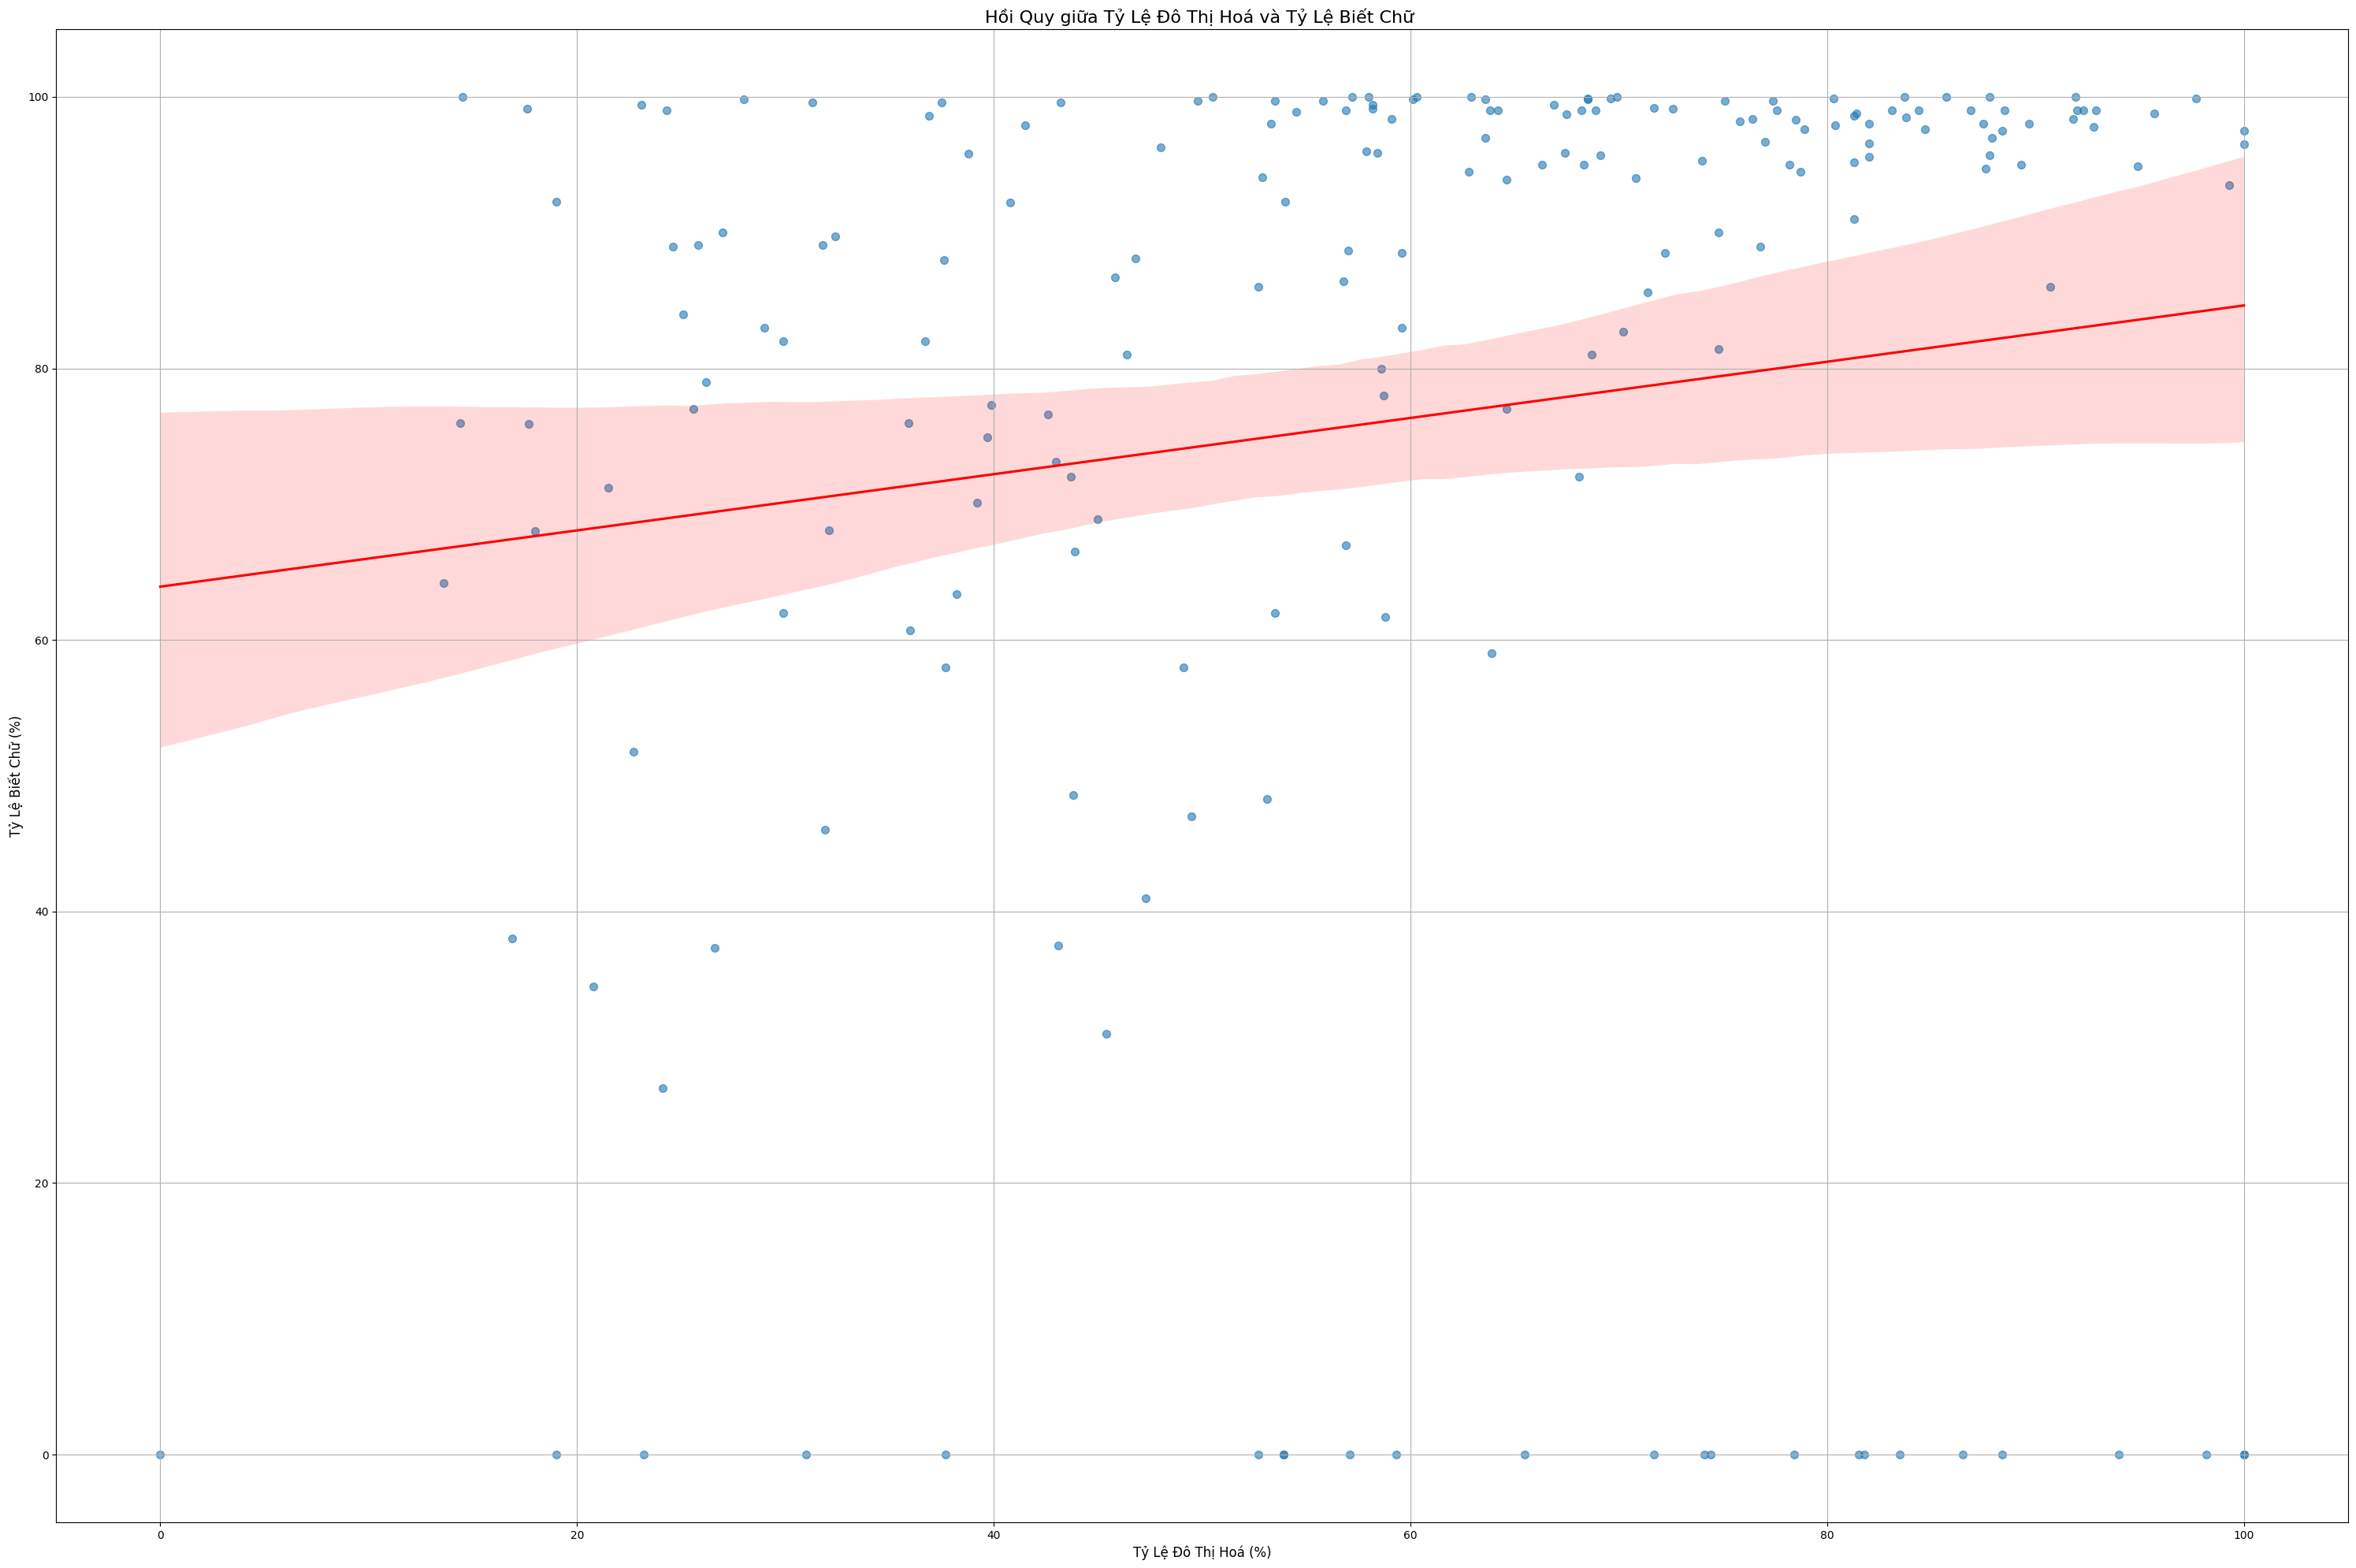

In [16]:
df["Tỷ Lệ Đô Thị Hoá (%)"] = pd.to_numeric(df["Tỷ Lệ Đô Thị Hoá (%)"], errors="coerce") * 100
df["Tỷ Lệ Biết Chữ (%)"] = pd.to_numeric(df["Tỷ Lệ Biết Chữ (%)"], errors="coerce") * 100

plt.figure(figsize=(30, 20))
sns.regplot(x=df['Tỷ Lệ Đô Thị Hoá (%)'],
            y=df['Tỷ Lệ Biết Chữ (%)'],
            data=df,
            scatter_kws={'s': 50, 'alpha': 0.6},
            line_kws={'color': 'red'})
plt.title('Hồi Quy giữa Tỷ Lệ Đô Thị Hoá và Tỷ Lệ Biết Chữ ', fontsize=16)
plt.xlabel('Tỷ Lệ Đô Thị Hoá (%)', fontsize=12)
plt.ylabel('Tỷ Lệ Biết Chữ (%)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Giải thích Ngắn Gọn Phần Code Biểu Đồ Hồi Quy

Đoạn code này sử dụng thư viện `seaborn` để tạo một biểu đồ hồi quy (regression plot) nhằm trực quan hóa mối quan hệ giữa 'Tỷ Lệ Đô Thị Hoá (%)' và 'Tỷ Lệ Biết Chữ (%)' từ DataFrame `df`.

* `plt.figure(figsize=(30, 20))`: Tạo một vùng vẽ (figure) với kích thước lớn (30x20 inch) để biểu đồ dễ nhìn.
* `sns.regplot(...)`: Hàm chính của `seaborn` để vẽ biểu đồ hồi quy.
    * `x=df['Tỷ Lệ Đô Thị Hoá (%)']`: Chỉ định cột 'Tỷ Lệ Đô Thị Hoá (%)' làm trục x.
    * `y=df['Tỷ Lệ Biết Chữ (%)']`: Chỉ định cột 'Tỷ Lệ Biết Chữ (%)' làm trục y.
    * `data=df`: Chỉ định DataFrame chứa dữ liệu để vẽ.
    * `scatter_kws={'s': 50, 'alpha': 0.6}`: Thiết lập các thuộc tính cho các điểm dữ liệu (scatter plot):
        * `'s': 50`: Kích thước của mỗi điểm là 50.
        * `'alpha': 0.6`: Độ trong suốt của mỗi điểm là 0.6 (giúp nhìn rõ hơn khi các điểm chồng lên nhau).
    * `line_kws={'color': 'red'}`: Thiết lập các thuộc tính cho đường hồi quy (regression line):
        * `'color': 'red'`: Màu của đường hồi quy là đỏ.



In [17]:
print(df.columns)

Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


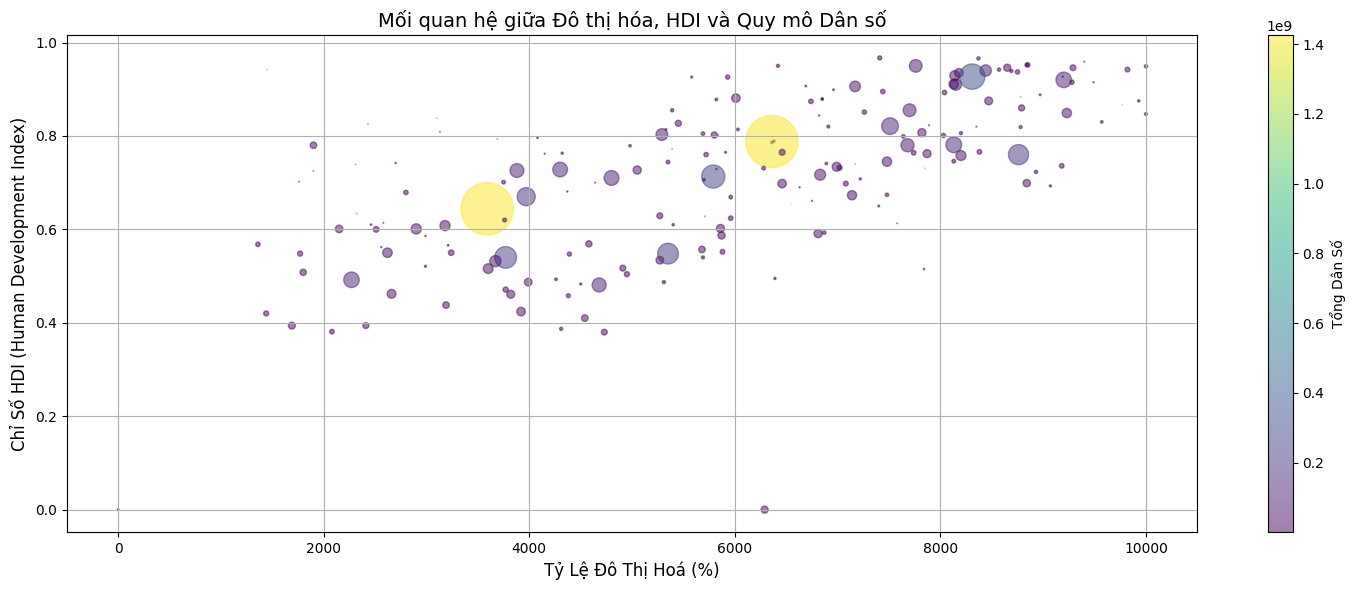

In [18]:
plt.figure(figsize=(15, 6))

bubble = plt.scatter(
    x=df["Tỷ Lệ Đô Thị Hoá (%)"] * 100,
    y=df["Chỉ Số HDI (Human Development Index)"],
    s=df["Tổng Dân Số"] / 1e6,  # Chia cho 1 triệu để kích thước bong bóng hợp lý hơn
    c=df["Tổng Dân Số"], 
    cmap="viridis",  # Chọn bảng màu (bạn có thể thử các bảng màu khác)
    alpha=0.5
)

plt.xlabel("Tỷ Lệ Đô Thị Hoá (%)", fontsize=12)  # Cập nhật nhãn trục x
plt.ylabel("Chỉ Số HDI (Human Development Index)", fontsize=12)
plt.title("Mối quan hệ giữa Đô thị hóa, HDI và Quy mô Dân số", fontsize=14)
plt.grid(True)

# Thêm chú thích kích thước bong bóng (colorbar)
plt.colorbar(bubble, label='Tổng Dân Số')  # Cập nhật nhãn colorbar

plt.tight_layout()
plt.show()

# Giải thích Ngắn Gọn Phần Code Biểu Đồ Bong Bóng

Đoạn code này sử dụng `matplotlib.pyplot` để tạo một biểu đồ bong bóng (bubble chart) nhằm trực quan hóa mối quan hệ giữa 'Tỷ Lệ Đô Thị Hoá (%)', 'Chỉ Số HDI (Human Development Index)', và 'Tổng Dân Số' từ DataFrame `df`.

* `bubble = plt.scatter(...)`: Hàm `plt.scatter` được sử dụng để tạo biểu đồ tán xạ, và trong trường hợp này, kích thước của các điểm (bong bóng) và màu sắc của chúng cũng mang thông tin.
    * `x=df["Tỷ Lệ Đô Thị Hoá (%)"] * 100`: Chỉ định cột 'Tỷ Lệ Đô Thị Hoá (%)' (nhân với 100 để chuyển thành phần trăm) làm vị trí trên trục x.
    * `y=df["Chỉ Số HDI (Human Development Index)"]`: Chỉ định cột 'Chỉ Số HDI' làm vị trí trên trục y.
    * `s=df["Tổng Dân Số"] / 1e6`: Chỉ định kích thước của mỗi bong bóng dựa trên cột 'Tổng Dân Số', chia cho 1 triệu để kích thước hiển thị hợp lý hơn. Dân số càng lớn, bong bóng càng to.
    * `c=df["Tổng Dân Số"]`: Chỉ định màu sắc của mỗi bong bóng dựa trên cột 'Tổng Dân Số'. Các quốc gia có dân số khác nhau sẽ có màu sắc khác nhau theo bảng màu được chọn.
    * `cmap="viridis"`: Chọn bảng màu "viridis" để ánh xạ giá trị dân số sang màu sắc. `matplotlib` cung cấp nhiều bảng màu khác nhau để bạn lựa chọn.
    * `alpha=0.5`: Đặt độ trong suốt của các bong bóng là 0.5, giúp nhìn rõ hơn khi các bong bóng chồng lên nhau.


<Figure size 1500x1500 with 0 Axes>

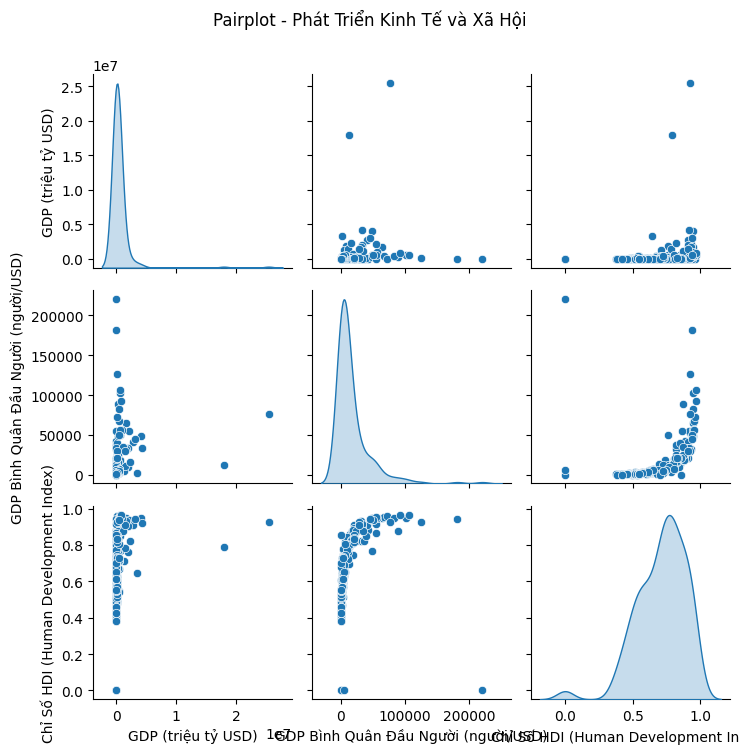

In [19]:

plt.figure(figsize=(15, 15))
sns.pairplot(data=df,
             vars=['GDP (triệu tỷ USD)',
                   'GDP Bình Quân Đầu Người (người/USD)',
                   'Chỉ Số HDI (Human Development Index)'],
             diag_kind="kde")
plt.suptitle("Pairplot - Phát Triển Kinh Tế và Xã Hội", y=1.0)
plt.tight_layout()
plt.show()

# Giải thích Ngắn Gọn Phần Code Pairplot

Đoạn code này sử dụng thư viện `seaborn` để tạo một biểu đồ pairplot, giúp khám phá mối quan hệ giữa nhiều cặp biến số cùng một lúc.

* `plt.figure(figsize=(15, 15))`: Tạo một vùng vẽ (figure) với kích thước 15x15 inch để chứa toàn bộ pairplot.
* `sns.pairplot(...)`: Hàm chính của `seaborn` để tạo pairplot.
    * `data=df`: Chỉ định DataFrame `df` chứa dữ liệu để phân tích.
    * `vars=['GDP (triệu tỷ USD)', 'GDP Bình Quân Đầu Người (người/USD)', 'Chỉ Số HDI (Human Development Index)']`: Chỉ định danh sách các cột (biến số) từ DataFrame mà bạn muốn xem xét mối quan hệ giữa chúng. Trong trường hợp này là GDP tổng, GDP bình quân đầu người và Chỉ số Phát triển Con người (HDI).
    * `diag_kind="kde"`: Xác định kiểu biểu đồ sẽ được hiển thị trên đường chéo (diagonal) của pairplot. `"kde"` là viết tắt của Kernel Density Estimate, một cách để ước tính hàm mật độ xác suất của từng biến.
* `plt.suptitle("Pairplot - Phát Triển Kinh Tế và Xã Hội", y=1.0)`: Thêm một tiêu đề lớn (suptitle) cho toàn bộ figure. `"Pairplot - Phát Triển Kinh Tế và Xã Hội"` là tiêu đề, và `y=1.0` điều chỉnh vị trí của tiêu đề theo chiều dọc.

In [20]:
print(df.columns)

Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


In [21]:
print(df.columns)

Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


In [22]:
df.columns = df.columns.str.strip()


df = df.drop(columns=['STT'])

* drop cái STT đi để kh ảnh hưởng data và lọc ra chỉ lấy các cột có dữ liệu là số để vẽ ma trận

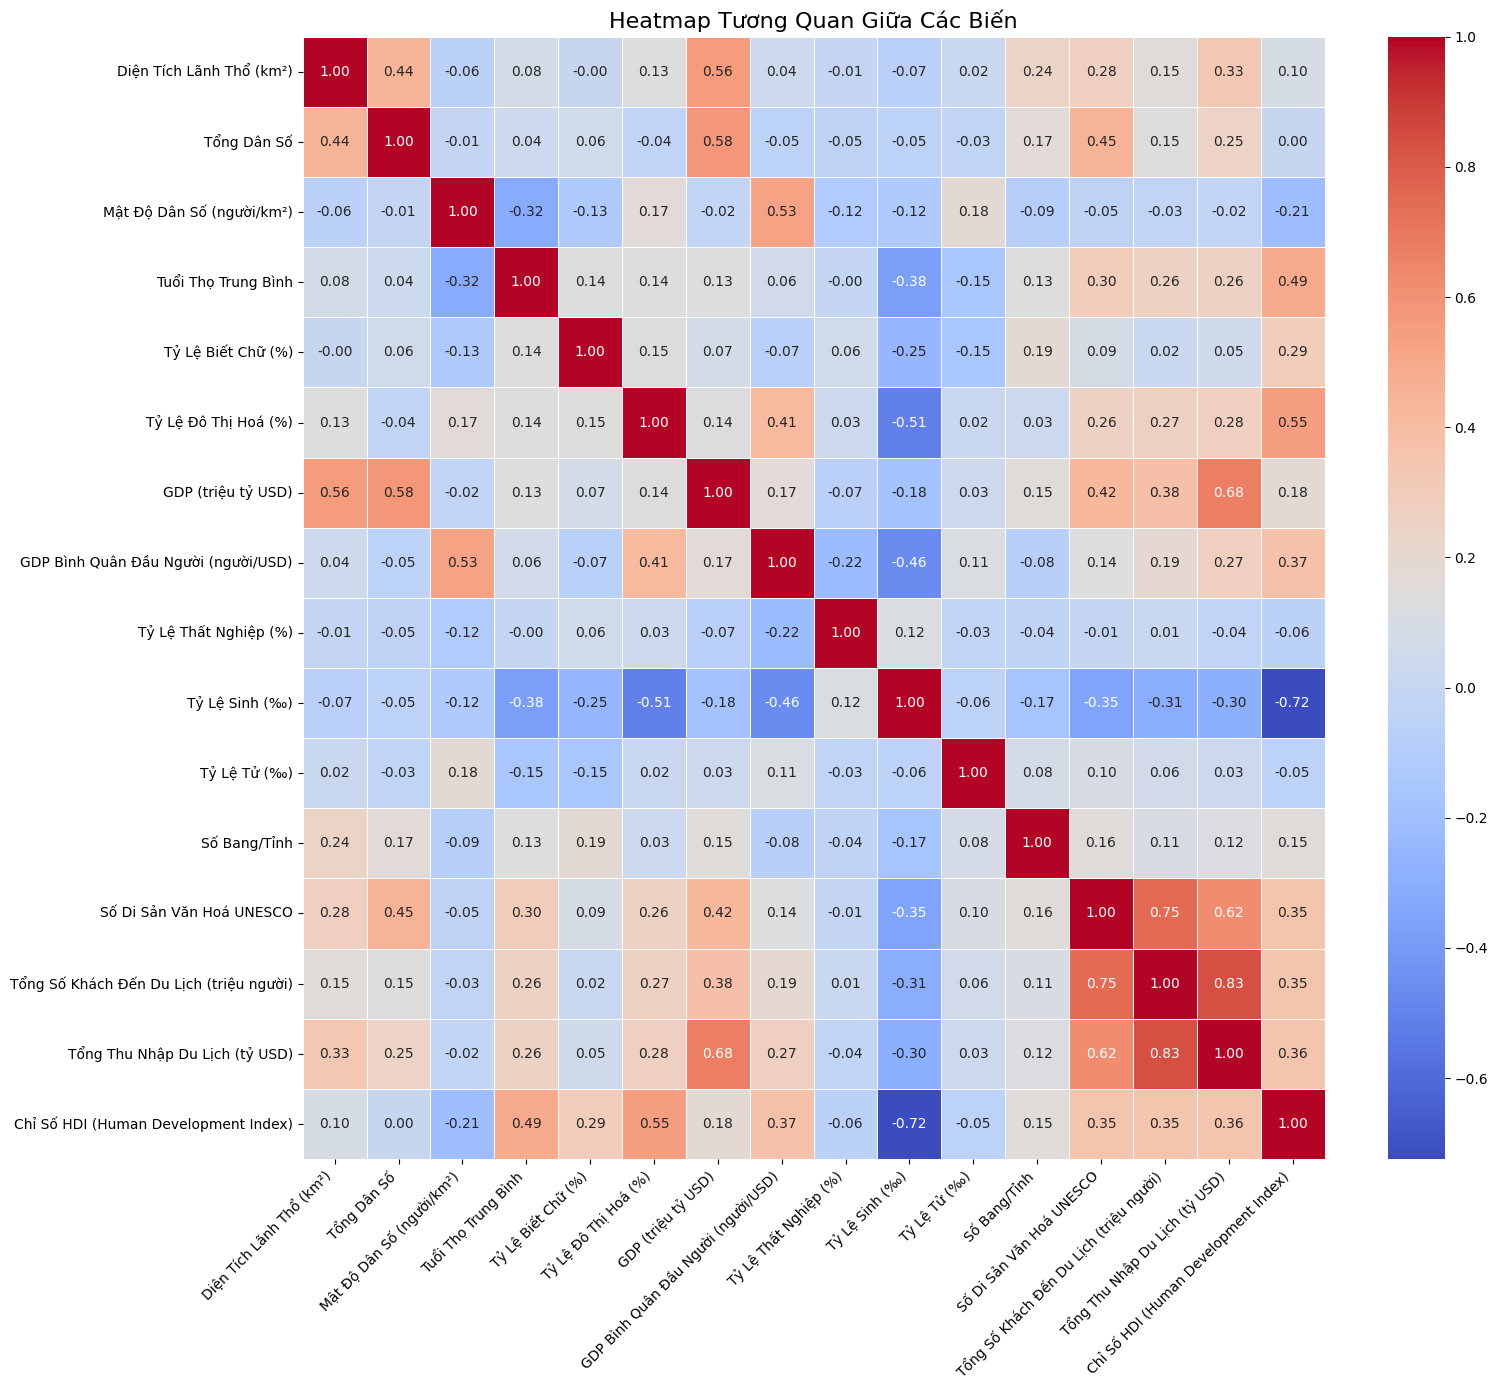

In [23]:
numeric_cols = [
    "Diện Tích Lãnh Thổ (km²)",
    "Tổng Dân Số",
    "Mật Độ Dân Số (người/km²)",
    "Tuổi Thọ Trung Bình",
    "Tỷ Lệ Biết Chữ (%)",
    "Tỷ Lệ Đô Thị Hoá (%)",
    "GDP (triệu tỷ USD)",
    "GDP Bình Quân Đầu Người (người/USD)",
    "Tỷ Lệ Thất Nghiệp (%)",
    "Tỷ Lệ Sinh (‰)",
    "Tỷ Lệ Tử (‰)",
    "Số Bang/Tỉnh",
    "Số Di Sản Văn Hoá UNESCO",
    "Tổng Số Khách Đến Du Lịch (triệu người)",
    "Tổng Thu Nhập Du Lịch (tỷ USD)",
    "Chỉ Số HDI (Human Development Index)"
]

df_numeric = df[numeric_cols].copy()

# Tính ma trận tương quan
correlation_matrix = df_numeric.corr()

# Vẽ heatmap tương quan
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Tương Quan Giữa Các Biến', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Heatmap Tương Quan Giữa Các Yếu Tố

Biểu đồ này sử dụng **heatmap tương quan** để trực quan hóa mối quan hệ giữa các yếu tố kinh tế, xã hội và địa lý của các quốc gia.

- **Màu sắc:** Thể hiện mức độ tương quan tuyến tính giữa các cặp yếu tố.
    - **Đỏ đậm:** Tương quan dương mạnh (khi một yếu tố tăng, yếu tố kia cũng có xu hướng tăng).
    - **Xanh đậm:** Tương quan âm mạnh (khi một yếu tố tăng, yếu tố kia có xu hướng giảm).
    - **Trắng/Nhạt:** Tương quan yếu hoặc không có tương quan rõ rệt.

- **Số trên ô:** Hiển thị hệ số tương quan cụ thể, giá trị từ -1 đến 1.
    - Gần 1: Tương quan dương mạnh.
    - Gần -1: Tương quan âm mạnh.
    - Gần 0: Tương quan yếu.

**Mục đích:** Giúp nhanh chóng nhận diện các mối liên hệ đáng chú ý giữa các yếu tố như diện tích, dân số, GDP, HDI, tỷ lệ đô thị hóa, v.v. Ví dụ, chúng ta có thể thấy liệu GDP có tương quan với tuổi thọ trung bình hay không, hoặc mật độ dân số ảnh hưởng đến tỷ lệ thất nghiệp như thế nào.

**Cách đọc:** Tìm một ô giao giữa hai yếu tố bạn quan tâm. Màu sắc và số trên ô đó sẽ cho biết mối quan hệ giữa chúng.

In [24]:
df

,Tên Quốc Gia,Thủ Đô,Diện Tích Lãnh Thổ (km²),Tổng Dân Số,Mật Độ Dân Số (người/km²),Tuổi Thọ Trung Bình,Tỷ Lệ Biết Chữ (%),Tỷ Lệ Đô Thị Hoá (%),GDP (triệu tỷ USD),GDP Bình Quân Đầu Người (người/USD),Tỷ Lệ Thất Nghiệp (%),Tỷ Lệ Sinh (‰),Tỷ Lệ Tử (‰),Số Bang/Tỉnh,Số Di Sản Văn Hoá UNESCO,Tổng Số Khách Đến Du Lịch (triệu người),Tổng Thu Nhập Du Lịch (tỷ USD),Chỉ Số HDI (Human Development Index),Mật Độ Dân Số (người/km²))
0,Afghanistan,Kabul,652230.0,40578842.0,62,63.0,37.3,26.6,14583.0,359.374,0.141,0.360,0.060,34,2,0.000,0.000,0.462,62
1,Albania,Tirana,27400.0,2777689.0,101,77.0,99.0,63.8,18882.0,6797.737,0.101,0.103,0.087,12,3,0.072,0.030,0.789,101
2,Algeria,Algiers,2381741.0,45477389.0,19,77.0,81.4,74.8,191913.0,4219.965,0.124,0.205,0.046,58,6,0.014,0.002,0.745,19
3,Andorra,Andorra la Vella,470.0,79705.0,170,0.0,100.0,87.8,3352.0,42055.078,0.000,0.068,0.059,7,1,0.036,0.022,0.884,170
4,Angola,Luanda,1246700.0,35635029.0,29,62.0,72.0,68.1,106714.0,2994.638,0.146,0.381,0.071,18,0,0.001,0.000,0.591,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,"Venezuela, RB",Caracas,882050.0,28213017.0,32,71.0,97.5,88.4,0.0,0.000,0.057,0.150,0.073,24,2,0.007,0.003,0.699,32
190,Viet Nam,Hanoi,313429.0,99680655.0,318,75.0,95.8,38.8,408802.0,4101.117,0.015,0.143,0.065,63,5,0.037,0.038,0.726,318
191,"Yemen, Rep.",Sana'a,527970.0,38222876.0,72,64.0,70.1,39.2,0.0,0.000,0.174,0.354,0.052,22,4,0.000,0.000,0.424,72
192,Zambia,Lusaka,743390.0,20152938.0,27,62.0,86.7,45.8,29784.0,1477.899,0.060,0.335,0.056,10,0,0.011,0.008,0.569,27


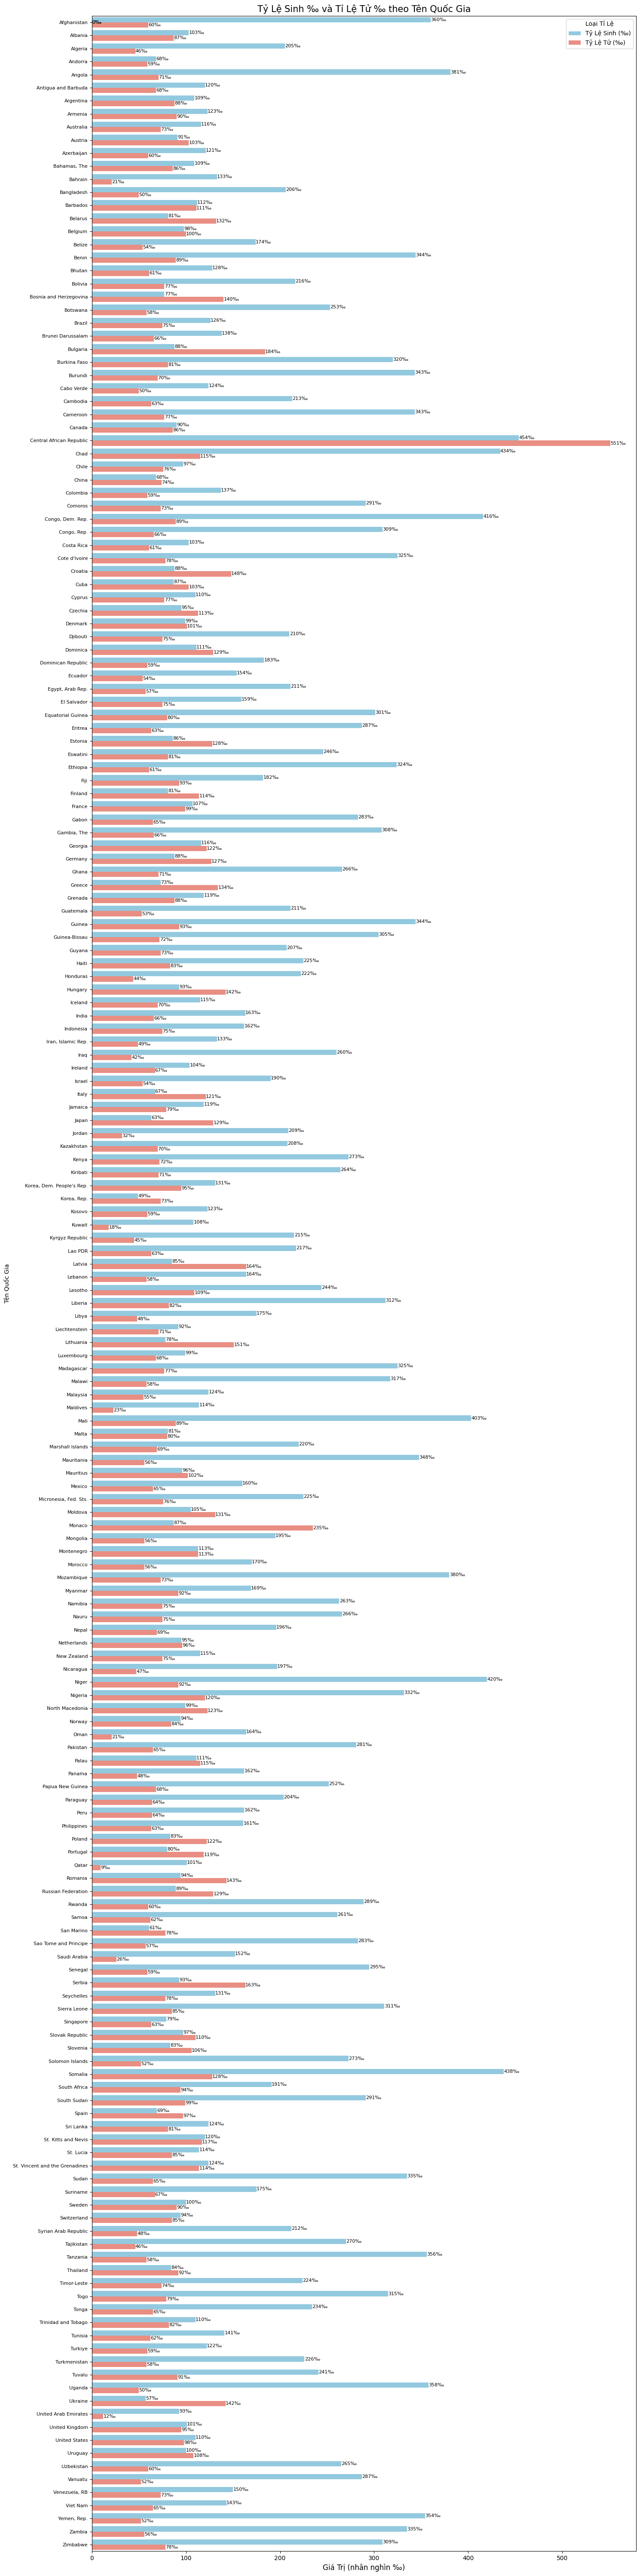

In [25]:
plt.figure(figsize=(15, 60))

# Chuyển đổi dữ liệu từ dạng rộng sang dạng dài
df_long = df.melt(id_vars=["Tên Quốc Gia"], value_vars=["Tỷ Lệ Sinh (‰)", "Tỷ Lệ Tử (‰)"],
                  var_name="Loại Tỉ Lệ", value_name="Giá Trị")

# Nhân giá trị với 1000
df_long['Giá Trị (‰)'] = df_long['Giá Trị'] * 1000

# Định nghĩa bảng màu tùy chỉnh
custom_palette = {"Tỷ Lệ Sinh (‰)": "skyblue", "Tỷ Lệ Tử (‰)": "salmon"}

# Vẽ biểu đồ
ax = sns.barplot(y="Tên Quốc Gia", x="Giá Trị (‰)", hue="Loại Tỉ Lệ", data=df_long, palette=custom_palette)

# Thêm giá trị vào cuối mỗi cột với dấu ‰
for p in ax.patches:
    width = p.get_width()
    if not pd.isna(width):
        ax.text(width + 0.1,  # Vị trí x: cuối cột + khoảng trắng
                p.get_y() + p.get_height() / 2.,  # Vị trí y: giữa cột
                f'{width:.0f}‰',  # Hiển thị giá trị với 1 chữ số thập phân và dấu ‰
                va='center', ha='left', fontsize=8, color='black')

# Định dạng biểu đồ
plt.xticks(fontsize=10)
plt.yticks(rotation=0, fontsize=8)
plt.xlabel("Giá Trị (nhân nghìn ‰)", fontsize=12)
plt.ylabel("Tên Quốc Gia", fontsize=10)
plt.title("Tỷ Lệ Sinh ‰ và Tỉ Lệ Tử ‰ theo Tên Quốc Gia", fontsize=15)
plt.legend(title="Loại Tỉ Lệ", loc='upper right')
plt.tight_layout()
plt.show()



Đoạn code này tạo một biểu đồ bar ngang để so sánh 'Tỷ Lệ Sinh (‰)' và 'Tỷ Lệ Tử (‰)' của các quốc gia từ DataFrame `df`.

* `df_long = df.melt(...)`: Sử dụng hàm `melt` của pandas để chuyển DataFrame từ dạng rộng sang dạng dài (long format). Điều này cần thiết để vẽ biểu đồ so sánh hai cột 'Tỷ Lệ Sinh (‰)' và 'Tỷ Lệ Tử (‰)' cạnh nhau cho mỗi quốc gia.
    * `id_vars=["Tên Quốc Gia"]`: Cột 'Tên Quốc Gia' được giữ nguyên làm định danh.
    * `value_vars=["Tỷ Lệ Sinh (‰)", "Tỷ Lệ Tử (‰)"]`: Hai cột này sẽ được "unpivoted" thành một cột mới.
    * `var_name="Loại Tỉ Lệ"`: Tên của cột mới chứa tên của các cột ban đầu ('Tỷ Lệ Sinh (‰)' hoặc 'Tỷ Lệ Tử (‰)').
    * `value_name="Giá Trị"`: Tên của cột mới chứa giá trị tương ứng từ các cột ban đầu.
* `df_long['Giá Trị (‰)'] = df_long['Giá Trị'] * 1000`: Tạo một cột mới 'Giá Trị (‰)' bằng cách nhân giá trị từ cột 'Giá Trị' với 1000. **Lưu ý:** Nếu đơn vị của 'Tỷ Lệ Sinh (‰)' và 'Tỷ Lệ Tử (‰)' đã là phần nghìn, bước nhân này có thể không cần thiết hoặc không chính xác. Hãy kiểm tra lại đơn vị dữ liệu gốc.
* `custom_palette = {"Tỷ Lệ Sinh (‰)": "skyblue", "Tỷ Lệ Tử (‰)": "salmon"}`: Định nghĩa một bảng màu tùy chỉnh để gán màu "skyblue" cho 'Tỷ Lệ Sinh (‰)' và "salmon" cho 'Tỷ Lệ Tử (‰)' trên biểu đồ.
* `ax = sns.barplot(...)`: Vẽ biểu đồ bar ngang bằng `seaborn.barplot`:
    * `y="Tên Quốc Gia"`: Tên quốc gia trên trục y.
    * `x="Giá Trị (‰)"`: Giá trị (tỷ lệ sinh/tử đã nhân 1000) trên trục x.
    * `hue="Loại Tỉ Lệ"`: Phân biệt các bar dựa trên cột 'Loại Tỉ Lệ' (sinh hoặc tử) bằng màu sắc.
    * `data=df_long`: DataFrame đã được chuyển đổi sang dạng dài.
    * `palette=custom_palette`: Sử dụng bảng màu tùy chỉnh.
* `for p in ax.patches:` ... `ax.text(...)`: Thêm giá trị vào cuối mỗi bar với ký hiệu "‰".
    * Lặp qua từng bar (`patch`).
    * Lấy chiều rộng (`width`) của bar.
    * Sử dụng `ax.text` để thêm văn bản hiển thị giá trị (đã nhân 1000) với ký hiệu "‰" ở cuối mỗi bar.


In [26]:
print(df.columns)

Index(['Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)', 'Tổng Dân Số',
       'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


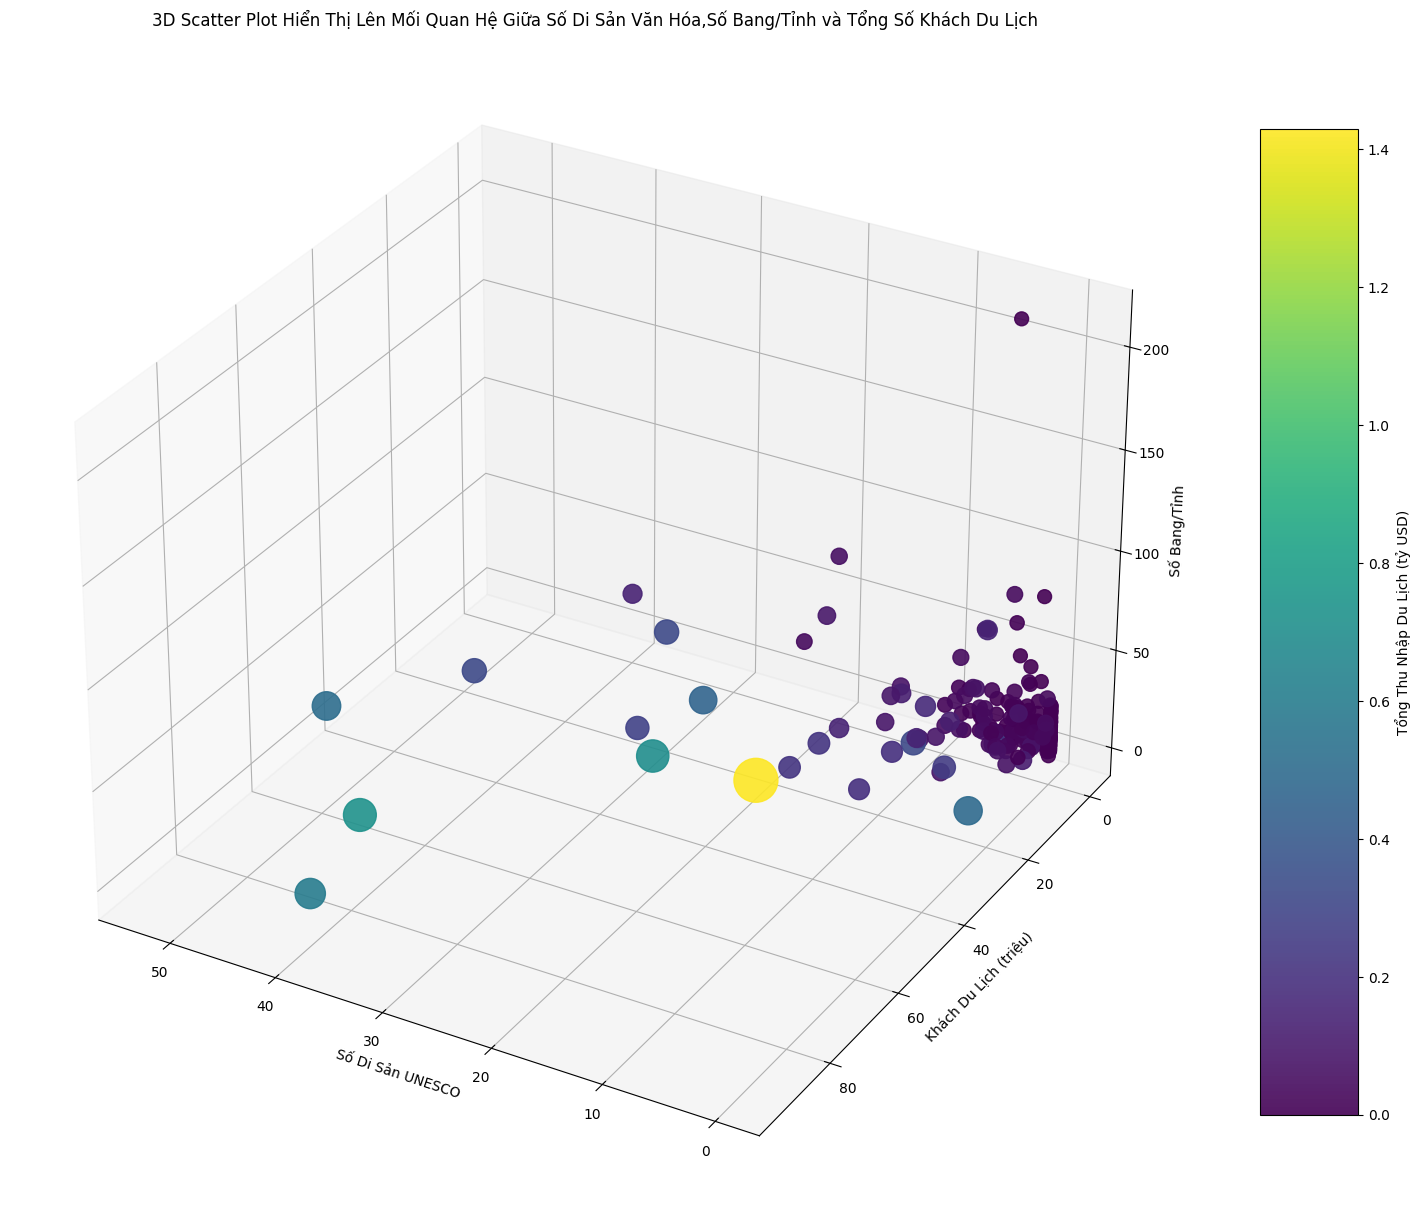

In [27]:
df['Tổng Số Khách (triệu.)'] = df['Tổng Số Khách Đến Du Lịch (triệu người)'] * 100

# Scale kích thước dot để dễ nhìn hơn
scaler = MinMaxScaler(feature_range=(100, 1000))
dot_sizes = scaler.fit_transform(df[["Tổng Thu Nhập Du Lịch (tỷ USD)"]]).flatten()

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df["Số Di Sản Văn Hoá UNESCO"],
    df["Tổng Số Khách (triệu.)"],  
    df["Số Bang/Tỉnh"],
    s=dot_sizes,
    c=df["Tổng Thu Nhập Du Lịch (tỷ USD)"],
    cmap="viridis",
    alpha=0.9
)

# Gán nhãn trục và tiêu đề
ax.set_xlabel("Số Di Sản UNESCO", fontsize=10)
ax.set_ylabel("Khách Du Lịch (triệu)", fontsize=10)
ax.set_zlabel("Số Bang/Tỉnh", fontsize=10)
plt.title("3D Scatter Plot Hiển Thị Lên Mối Quan Hệ Giữa Số Di Sản Văn Hóa,Số Bang/Tỉnh và Tổng Số Khách Du Lịch ", fontsize=12)

# Thêm colorbar
cbar = plt.colorbar(sc, shrink=0.5, aspect=10)
cbar.set_label('Tổng Thu Nhập Du Lịch (tỷ USD)')

# Góc nhìn đẹp
ax.view_init(elev=30, azim=120)

plt.tight_layout()
plt.show()



tạo một biểu đồ tán xạ ba chiều (3D scatter plot) để khám phá mối quan hệ giữa 'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách (triệu.)', và 'Số Bang/Tỉnh', với kích thước và màu sắc của các điểm được điều khiển bởi 'Tổng Thu Nhập Du Lịch (tỷ USD)'.

* `scaler = MinMaxScaler(feature_range=(100, 1000))`: Tạo một đối tượng `MinMaxScaler` để chuẩn hóa cột 'Tổng Thu Nhập Du Lịch (tỷ USD)' về một dải giá trị từ 100 đến 1000. Điều này được sử dụng để điều chỉnh kích thước của các điểm (bong bóng) trong biểu đồ 3D, giúp chúng có kích thước dễ quan sát hơn.
* `dot_sizes = scaler.fit_transform(...)`: Áp dụng quá trình chuẩn hóa và lấy mảng kết quả để làm kích thước cho các điểm. `.flatten()` chuyển mảng 2D thành mảng 1D.
* `fig = plt.figure(figsize=(15, 20))`: Tạo một vùng vẽ (figure) với kích thước 15x20 inch.
* `ax = fig.add_subplot(111, projection='3d')`: Thêm một subplot 3D vào figure.
* `sc = ax.scatter(...)`: Vẽ biểu đồ tán xạ 3D:
    * `df["Số Di Sản Văn Hoá UNESCO"]`: Dữ liệu cho trục x.
    * `df["Tổng Số Khách (triệu.)"]`: Dữ liệu cho trục y.
    * `df["Số Bang/Tỉnh"]`: Dữ liệu cho trục z.
    * `s=dot_sizes`: Kích thước của mỗi điểm được xác định bởi 'Tổng Thu Nhập Du Lịch (tỷ USD)' sau khi chuẩn hóa.
    * `c=df["Tổng Thu Nhập Du Lịch (tỷ USD)"]`: Màu sắc của mỗi điểm được xác định bởi giá trị 'Tổng Thu Nhập Du Lịch (tỷ USD)'.
    * `cmap="viridis"`: Sử dụng bảng màu "viridis" để ánh xạ giá trị thu nhập du lịch sang màu sắc.
    * `alpha=0.9`: Độ trong suốt của các điểm là 0.9.
* `ax.set_xlabel(...)`, `ax.set_ylabel(...)`, `ax.set_zlabel(...)`: Đặt nhãn cho các trục x, y, và z.
* `plt.title(...)`: Đặt tiêu đề cho biểu đồ.
* `cbar = plt.colorbar(...)`: Thêm một colorbar để giải thích sự ánh xạ giữa màu sắc của các điểm và giá trị 'Tổng Thu Nhập Du Lịch (tỷ USD)'.
* `cbar.set_label(...)`: Đặt nhãn cho colorbar.
* `ax.view_init(elev=30, azim=120)`: Đặt góc nhìn ban đầu cho biểu đồ 3D (độ cao 30 độ và góc phương vị 120 độ).